# Examining Influential Factors on Poverty Status
## Introduction, Data Cleaning, and Exploratory Data Analysis
---

## Table of Contents:
- [Problem Statement](#problem_statement)
- [Data Cleaning](#data_cleaning)
- [Data Dictionary](#data_dictionary)
- [Exploratory Data Analysis](#eda)
- [Data Visualization](#dv)
- [EDA Conclusion](#eda_c)

## Problem Statement<a id='problem_statement'></a>
---

This project aims to develop strategies for reducing economic disparities in the United States by using data analysis on The Current Population Survey (CPS) to identify groups of people who are at risk of poverty or financial struggles. We will use clustering (KMeans, DBScan, KModes) and inferential classification techniques (Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier) to group people based on their education, healthcare access, and other factors in order to determine how these specific factors influence Supplemental Poverty Measure (SPM) poverty likelihood. The impact of the most noteworthy features will be analyzed. The effectiveness of our classification models will be evaluated on balanced accuracy and F1 score. The insights we gain will help non-profits, policymakers, and government agencies develop targeted interventions and policies to promote economic equity and help those who need it most.

### Background Research

**CPS**

According to the Bureau of the Census, 
> "The CPS is the source of the official Government statistics on employment and unemployment. The CPS has been conducted monthly for over 50 years. Currently, we interview about 54,000 households monthly, scientifically selected on the basis of area of residence to represent the nation as a whole, individual states, and other specified areas. Each household is interviewed once a month for four consecutive months one year, and again for the corresponding time period a year later." <sup>1</sup>

Employment, demographic, health, and education information collected provide important information on the nation's status than can impact the planning and evaluation of many relevant agencies. 

**SPM**

According to the Congressional Research Service,
> "Under the SPM, the measure of need is based on recent spending data from the Consumer Expenditure Survey; namely, a percentage of median family spending on food, clothing, shelter, and utilities (plus an extra 20% for miscellaneous expenses such as personal care products), as opposed to having been computed once and indexed forward for inflation (as is done for the official measure). For the resources necessary to meet that level of need, the SPM uses after-tax income (which includes tax credits), estimates the value of certain noncash benefits (such as food assistance), and subtracts some expenditures (such as work-related expenses, child care expenses, and medical expenses paid out-of-pocket) that families cannot
use toward the categories of basic needs that are used to define the SPM poverty level. This approach is intended to better reflect the economic choices families currently face, and to better reflect the effects of government programs on the low-income population, than does the official measure. " <sup>2</sup>

If the resources are less than the measure of need, the family or unrelated individual is considered to be in poverty; if resources are greater than or equal to the measure of need, the family or individual is classified as not being in poverty.<sup>2</sup>

Additionally, 

> "The SPM includes adjustments to reflect geographic variations in housing costs, and the estimated effects of taxes and in-kind benefits (such as housing, energy, and food assistance) on poverty, while the official measure does not. The SPM also takes a more expansive approach than the official measure in recognizing relationships among household members for the purpose of identifying how those members share costs and pool resources. Furthermore, while one-time payments such as economic stimuli are not considered as part of the official definition of income, these payments are considered as resources in the SPM. Because some types of tax credits and noncash benefits provide financial help to families and individuals in poverty, the SPM may be of interest to policymakers, particularly in light of the economic stimulus payments and tax credits
provided in 2021 in response to the COVID-19 pandemic."<sup>2</sup>

In 2021<sup>2</sup>,
> * "the overall poverty rate under the SPM fell 1.4 percentage points (to 7.8% from 9.2% in 2020),
> * nearly 4.5 million fewer people lived in poverty (25.6 million, down from 30.0 million in 2020) according
to the SPM,
> * SPM poverty rate declines were widespread among demographic groups, and
> * the SPM child poverty rate reached the lowest level ever recorded, having fallen to 5.2% from 9.7% in
2020; this reflects the effects of policies targeted toward children and families with children."

Poverty rate declines were widespread among demographic groups, ostensibly due to noncash assistance and refundable tax credits provided in response to the COVID-19 pandemic.<sup>2</sup>

1. [CPS Overview](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar22.pdf)
1. [Congressional Research Service](https://crsreports.congress.gov/product/pdf/R/R47354#:~:text=This%20remained%20true%20in%202021,couple%20families%20(Figure%202).)

### Data Description

[`pppub22.csv`](../data/pppub22.csv): Current Population Survey, 2022 Annual Social and Economic (ASEC) Supplement conducted by the Bureau of the Census for the Bureau of Labor Statistics. Dataset contains 152,732 observations.<sup>3</sup>

> * The universe is the civilian noninstitutional population of the United States living in housing units and members of the Armed Forces living off post or living with their families on post, as long as at least one civilian adult lives in the same household. 
> * The sample is located in approximately 826 sample areas comprising 1,328 counties and independent cities with coverage in every State and in the District of Columbia. In all, some 70,000 housing units or other living quarters
are assigned for interview each month; about 50,000 of them containing approximately 100,000 persons 15 years old and over are interviewed.
> * Also included are demographic data for approximately 22,000 children 0-14 years old and 400 Armed Forces members living withcivilians either on or off base within these households.
> * This ASEC Supplement provides the usual monthly labor force data, but in addition, provides supplemental data on work experience, income, noncash benefits, and migration. Comprehensive work experience information is given on the employment status,occupation, and industry of persons 15 years old and over. 

3. [CPS Overview](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar22.pdf)

## Data Cleaning<a id='data_cleaning'></a>
---

In [57]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

pd.set_option('display.max_columns', None)

In [130]:
#Import data

#need git lsf to read from data folder due to size
#df=pd.read_csv('../data/pppub22.csv')

#dataset repository link
df = pd.read_csv('https://media.githubusercontent.com/media/Rpierre98/DSI-320-Group-Project/main/data/pppub22.csv')
df.head()

,PERIDNUM,PH_SEQ,P_SEQ,A_LINENO,PF_SEQ,PHF_SEQ,OED_TYP1,OED_TYP2,OED_TYP3,PERRP,PXRRP,PXMARITL,PXRACE1,PEHSPNON,PXHSPNON,PEAFEVER,PXAFEVER,PEAFWHN1,PXAFWHN1,PEAFWHN2,PEAFWHN3,PEAFWHN4,PXSPOUSE,PENATVTY,PXNATVTY,PEMNTVTY,PXMNTVTY,PEFNTVTY,PXFNTVTY,PEINUSYR,PXINUSYR,PEPAR1,PXPAR1,PEPAR2,PXPAR2,PEPAR1TYP,PXPAR1TYP,PEPAR2TYP,PXPAR2TYP,PRDASIAN,PRDTHSP,PRDTRACE,PRPERTYP,PRCITFLG,PRCITSHP,PECOHAB,PXCOHAB,PEABSRSN,PEHRUSLT,PEMLR,PRDISC,PRPTREA,PRUNTYPE,PRWKSTAT,PEIO1COW,PRCOW1,PRERELG,PRWERNAL,PRHERNAL,PRNLFSCH,PEDISEAR,PEDISEYE,PEDISREM,PEDISPHY,PEDISDRS,PEDISOUT,PXDISEAR,PXDISEYE,PXDISREM,PXDISPHY,PXDISDRS,PXDISOUT,PRDISFLG,PECERT1,PECERT2,PECERT3,PXCERT1,PXCERT2,PXCERT3,A_AGE,A_SEX,A_DTIND,A_HRSPAY,A_PAYABS,A_WANTJB,A_HRLYWK,A_ENRLW,A_EXPLF,A_MJIND,A_UNMEM,A_MJOCC,A_DTOCC,A_UNCOV,A_HSCOL,A_FTPT,A_WKSCH,A_FNLWGT,A_ERNLWT,A_FAMREL,A_FAMNUM,AXAGE,AXSEX,AXLFSR,AXHRS,AXWHYABS,AXPAYABS,AXCLSWKR,AXNLFLJ,AXUSLHRS,AXUNMEM,AXUNCOV,AXENRLW,AXHSCOL,AXFTPT,AXHGA,AXHRLYWK,A_USLHRS,A_FAMTYP,A_GRSWK,A_WKSLK,A_SPOUSE,A_MARITL,A_HGA,A_HRS1,P_STAT,A_USLFT,A_CIVLF,A_FTLF,A_UNTYPE,A_CLSWKR,A_EXPRRP,A_WKSTAT,A_LFSR,A_WHYABS,A_PFREL,A_WHENLJ,A_NLFLJ,MARSUPWT,ACTC_CRD,AGE1,AGI,ANN_VAL,ANN_YN,CAID,CAP_VAL,CAP_YN,CHAMPVA,CHCARE_YN,CHELSEW_YN,CHSP_VAL,CHSP_YN,CLWK,COV,COV_CYR,COV_MULT_CYR,CSP_VAL,CSP_YN,CTC_CRD,DBTN_VAL,DEPDIR,DEPGRP,DEPMIL,DEPMRK,DEPMRKS,DEPMRKUN,DEPNONM,DEPPRIV,DIR,DIRFTYP,DIRFTYP2,DIRLIN1,DIROUT,DIS_CS,DIS_HP,DIS_SC1,DIS_SC2,DIS_VAL1,DIS_VAL2,DIS_YN,DIV_VAL,DIV_YN,DSAB_VAL,DST_SC1,DST_SC2,DST_SC1_YNG,DST_SC2_YNG,DST_VAL1,DST_VAL2,DST_VAL1_YNG,DST_VAL2_YNG,DST_YN,DST_YN_YNG,EARNER,ED_VAL,ED_YN,EIP_CRD,EIT_CRED,ERN_OTR,ERN_SRCE,ERN_VAL,ERN_YN,ESICOULD,ESIELIG1,ESIELIG2,ESIELIG3,ESIELIG4,ESIELIG5,ESIELIG6,ESIOFFER,ESITAKE1,ESITAKE2,ESITAKE3,ESITAKE4,ESITAKE5,ESITAKE6,ESITAKE7,ESITAKE8,FAMREL,FEDTAX_AC,FEDTAX_BC,FICA,FIN_VAL,FIN_YN,FRMOTR,FRM_VAL,FRSE_VAL,FRSE_YN,GRP,GRPFTYP,GRPFTYP2,GRPLIN1,GRPOUT,HEA,HHDFMX,HHDREL,HIPAID,HRCHECK,HRSWK,IHSFLG,INDUSTRY,INT_VAL,INT_YN,I_ANNVAL,I_ANNYN,I_CAID,I_CAPVAL,I_CAPYN,I_CHAMPVA,I_CHCAREYN,I_CHELSEWYN,I_CHSPVAL,I_CHSPYN,I_CSPVAL,I_CSPYN,I_DEPDIR,I_DEPGRP,I_DEPMIL,I_DEPMRK,I_DEPMRKS,I_DEPMRKUN,I_DEPNONM,I_DEPPRIV,I_DIR,I_DIROUT,I_DISCS,I_DISHP,I_DISSC1,I_DISSC2,I_DISYN,I_DIVVAL,I_DIVYN,I_DSTSC,I_DSTSCCOMP,I_DSTVAL1COMP,I_DSTVAL2COMP,I_DSTYNCOMP,I_EDTYP,I_EDYN,I_ERNSRC,I_ERNVAL,I_ERNYN,I_ESICOULD,I_ESIELIG1,I_ESIELIG2,I_ESIELIG3,I_ESIELIG4,I_ESIELIG5,I_ESIELIG6,I_ESIOFFER,I_ESITAKE1,I_ESITAKE2,I_ESITAKE3,I_ESITAKE4,I_ESITAKE5,I_ESITAKE6,I_ESITAKE7,I_ESITAKE8,I_FINVAL,I_FINYN,I_FRMVAL,I_FRMYN,I_GRP,I_GRPOUT,I_HEA,I_HIPAID,I_HRCHK,I_HRSWK,I_IHSFLG,I_INDUS,I_INTVAL,I_INTYN,I_LJCW,I_LKSTR,I_LKWEEK,I_LOSEWK,I_MCAID,I_MCARE,I_MCPREM,I_MIG1,I_MIG2,I_MIG3,I_MIL,I_MILOUT,I_MOOP,I_MOOP2,I_MRK,I_MRKOUT,I_MRKS,I_MRKSOUT,I_MRKUN,I_MRKUNOUT,I_NOEMP,I_NONM,I_NONMOUT,I_NOW_CAID,I_NOW_CHAMPVA,I_NOW_DEPDIR,I_NOW_DEPGRP,I_NOW_DEPMIL,I_NOW_DEPMRK,I_NOW_DEPMRKS,I_NOW_DEPMRKUN,I_NOW_DEPNONM,I_NOW_DEPPRIV,I_NOW_DIR,I_NOW_DIROUT,I_NOW_GRP,I_NOW_GRPOUT,I_NOW_HIPAID,I_NOW_IHSFLG,I_NOW_MCAID,I_NOW_MCARE,I_NOW_MIL,I_NOW_MILOUT,I_NOW_MRK,I_NOW_MRKOUT,I_NOW_MRKS,I_NOW_MRKSOUT,I_NOW_MRKUN,I_NOW_MRKUNOUT,I_NOW_NONM,I_NOW_NONMOUT,I_NOW_OTHMT,I_NOW_OUTDIR,I_NOW_OUTGRP,I_NOW_OUTMIL,I_NOW_OUTMRK,I_NOW_OUTMRKS,I_NOW_OUTMRKUN,I_NOW_OUTNONM,I_NOW_OUTPRIV,I_NOW_OWNDIR,I_NOW_OWNGRP,I_NOW_OWNMIL,I_NOW_OWNMRK,I_NOW_OWNMRKS,I_NOW_OWNMRKUN,I_NOW_OWNNONM,I_NOW_OWNPRIV,I_NOW_PCHIP,I_NOW_PRIV,I_NOW_PUB,I_NOW_VACARE,I_NWLKWK,I_NWLOOK,I_NXTRES,I_OCCUP,I_OEDVAL,I_OIVAL,I_OTHMT,I_OUTDIR,I_OUTGRP,I_OUTMIL,I_OUTMRK,I_OUTMRKS,I_OUTMRKUN,I_OUTNONM,I_OUTPRIV,I_OWNDIR,I_OWNGRP,I_OWNMIL,I_OWNMRK,I_OWNMRKS,I_OWNMRKUN,I_OWNNONM,I_OWNPRIV,I_PAWMO,I_PAWTYP,I_PAWVAL,I_PAWYN,I_PCHIP,I_PECOULD,I_PENINC,I_PENPLA,I_PENSC1,I_PENSC2,I_PENVAL1,I_PENVAL2,I_PENYN,I_PEOFFER,I_PEWNELIG1,I_PEWNELIG2,I_PEWNELIG3,I_PEWNELIG4,I_PEWNELIG5,I_PEWNELIG6,I_PEWNTAKE1,I_PEWNTAKE2,I_PEWNTAKE3,I_PEWNTAKE4,I_PEWNTAKE5,I_PEWNTAKE6,I_PEWNTAKE7,I_PEWNTAKE8,I_PHIPVAL,I_PHIPVAL2,I_PHMEMP,I_PMEDVAL

In [131]:
#Check shape
df.shape

(152732, 832)

In [132]:
#choose features to use in EDA and modeling
columns=['A_AGE','MIG_ST','A_FAMREL','PMED_VAL','POTC_VAL','A_MJOCC','A_HGA','A_MARITL',
         'A_SEX','HHDREL','PEAFEVER','PECERT3','PEDISDRS','PEDISEAR','PEDISEYE','PEDISOUT',
         'PEDISPHY','PEDISREM','PEHSPNON','PEINUSYR','PRCITSHP','PRDISFLG','PRDTRACE',
         'A_MJIND','PEMLR','PRWKSTAT','LJCW','WEIND','RSNNOTW','WEWKRS','WKSWORK',
         'ERN_SRCE','ERN_VAL','ERN_OTR','WSAL_VAL','DIS_HP','DIS_SC1','DIS_SC2','DSAB_VAL',
         'FIN_YN','OI_OFF','PAW_MON','PAW_TYP','WICYN','CHSP_VAL','AGI','FILESTAT','COV',
         'PUB_CYR','PRIV_CYR','SPM_POOR', 'PERLIS']

df=df[columns]

In [133]:
#rename columns to be more descriptive
df = df.rename(columns=
               {'A_AGE': 'AGE', 'MIG_ST': 'STATE','A_FAMREL':'FAM_RELATIONSHIP',
                'PMED_VAL':'OUT_POCKET_NONPREM','POTC_VAL':'OUT_POCKET_OC','A_MJOCC':'OCCUPATION',
                'A_HGA':'EDU_LVL','A_MARITL':'MARITAL','A_SEX':'SEX','HHDREL':'HOUSEHOLD_SUMMARY',
                'PEAFEVER':'MILITARY','PECERT3':'CERT_REQ','PEDISDRS':'TROUB_BATHE','PEDISEAR':'TROUB_HEAR',
                'PEDISEYE':'TROUB_SEE','PEDISOUT':'TROUB_ALONE','PEDISPHY':'TROUB_WALK','PEDISREM':'TROUB_CONC',
                'PEHSPNON':'HISPANIC','PEINUSYR':'IMMIGR_YR','PRCITSHP':'CITIZENSHIP','PRDISFLG':'DISABLED',
                'PRDTRACE':'RACE','A_MJIND':'WORK_INDUSTRY','PEMLR':'LABOR_STATUS','PRWKSTAT':'WRK_STATUS',
                'LJCW':'WRK_CLASS_LONGEST','WEIND':'LONGEST_IND','RSNNOTW':'NO_WRK_RSN','WEWKRS':'FT_PT',
                'WKSWORK':'WEEKS_WRK','ERN_SRCE':'EARN_SOURCE','ERN_VAL':'GROSS_PAY','ERN_OTR':'ERN_OTR',
                'WSAL_VAL':'EARN_TOTAL','DIS_HP':'WORK_DIS','DIS_SC1':'DIS_INC','DIS_SC2':'OTH_DIS_INC',
                'DSAB_VAL':'TOTAL_DIS_INC','FIN_YN':'FIN_ASSIST','OI_OFF':'OTH_INC','PAW_MON':'TIME_ASSIST',
                'PAW_TYP':'CASH_ASSIST','WICYN':'WIC','CHSP_VAL':'CHLD_SUP','AGI':'ADJ_GROSS_INC',
                'FILESTAT':'TAX_FILE_STAT','COV':'HEALTH_INS','PUB_CYR':'PUB_INS','PRIV_CYR':'PRIV_INS',
                'SPM_POOR': 'POV_STS', 'PERLIS' : 'POV_LVL'})

In [134]:
#decode nominal categorical variables for easier interpretation in modeling
df=df.replace({'STATE' : {0 : 'nonmover', 1 : 'Alabama', 2 : 'Alaska', 4 :' Arizona', 5 : 'Arkansas',
                          6 : 'California', 8 : 'Colorado', 9 : 'Connecticut', 10 : 'Delaware',
                          11 : 'District of Columbia', 12 : 'Florida', 13 : 'Georgia', 15 : 'Hawaii',
                          16 : 'Idaho', 17 : 'Illinois', 18 : 'Indiana', 19 : 'Iowa', 20 : 'Kansas',
                          21 : 'Kentucky', 22 : 'Louisiana', 23 : 'Maine', 24 : 'Maryland',
                          25 : 'Massachusetts', 26 : 'Michigan', 27 : 'Minnesota', 28 : 'Mississippi',
                          29 : 'Missouri', 30 : 'Montana', 31 : 'Nebraska', 32 : 'Nevada', 33 : 'New Hampshire',
                          34 : 'New Jersey', 35 : 'New Mexico', 36 : 'New York', 37 : 'North Carolina',
                          38 : 'North Dakota', 39 : 'Ohio', 40 : 'Oklahoma', 41 : 'Oregon', 42 : 'Pennsylvania',
                          44 : 'Rhode Island', 45 : 'South Carolina', 46 : 'South Dakota', 47 : 'Tennessee',
                          48 : 'Texas', 49 : 'Utah', 50 : 'Vermont', 51 : 'Virginia', 53 : 'Washington',
                          54 : 'West Virginia', 55 : 'Wisconsin', 56 : 'Wyoming', 96 : 'Abroad'}})

df=df.replace({'FAM_RELATIONSHIP' : { 0 : 'not fam', 1 : 'ref person',2:'spouse',3:'child',4:'other relatives'}})

df=df.replace({'OCCUPATION' : { 0 : 'none', 1 : 'Business/Finance',2:'Professional',3:'Service',4:'sales',
                               5:'office',6:'farming',7:'construction',8:'maintenance',9:'production',
                               10:'transportation',11:'military'}})

df=df.replace({'EDU_LVL' : {0 : 'children', 31 : 'preschool', 32 : 'elementary school', 33 : 'elementary school',
                            34 : 'middle school', 35 : 'high school no diploma', 36 : 'high school no diploma',
                            37 : 'high school no diploma', 38 : 'high school no diploma', 39 : 'high school graduate',
                            40 : 'college no degree', 41 : 'associate degree', 42 : 'associate degree',
                            43 : "bachelor's degree", 44 : "master's degree" , 45 : 'professional school degree',
                            46 : 'doctorate degree'}})

df=df.replace({'MARITAL' : { 1 : 'married/civilian spouse', 2 : 'married/military spouse',3:'married/estranged',
                            4:'widowed',5:'divorced',6:'seperated',7:'single'}})

df=df.replace({'SEX' : { 1 : 'male', 2 : 'female'}})

df=df.replace({'HOUSEHOLD_SUMMARY' : { 1 : 'householder', 2 : 'spouse of HH',3:'child/never married',
                                      4:'under 18/ever married',5:'over 18',6:'relative',7:'non-relative',
                                      8:'group living'}})

df=df.replace({'MILITARY' : { -1 : 'ineligible', 1 : 'yes',2:'no'}})

df=df.replace({'CERT_REQ' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_BATHE' : { -1 : 'not included', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_HEAR' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_SEE' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_ALONE' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_WALK' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'TROUB_CONC' : { -1 : 'none', 1 : 'yes',2:'no'}})

df=df.replace({'HISPANIC' : { 1 : 'yes',2:'no'}})

df=df.replace({'IMMIGR_YR' : {0 : 'not immigrant', 1 : 'before 1950', 2 : '1950s', 3 : '1960s', 4 : '1960s',
                              5 : '1970s', 6 : '1970s', 7 : '1980s', 8 : '1980s', 9 : '1980s', 10 : '1980s',
                              11 : '1980s', 12 : '1990s', 13 : '1990s', 14 : '1990s', 15 : '1990s', 16 : '1990s',
                              17 : '2000s', 18 : '2000s', 19 : '2000s', 20 : '2000s', 21 : '2000s', 22 : '2010s',
                              23 : '2010s', 24 : '2010s', 25 : '2010s', 26 : '2010s', 27 : '2020s'}})

df=df.replace({'CITIZENSHIP' : { 1 : 'native', 2:'native',3:'native',4:'non native citizen',5:'non citizen'}})

df=df.replace({'DISABLED' : { -1 : 'not included', 1 : 'yes',2:'no'}})

df=df.replace({'RACE' : {1 : 'White only', 2 : 'Black only', 3 : 'American Indian or Alaskan Native only',
                      4 : 'Asian only', 5 : 'Hawaiian/Pacific Islander only', 6 : 'White-Black', 7 : 'White-AI',
                      8 : 'White-Asian', 9 : 'White-HP', 10 : 'Black-AI', 11 :' Black-Asian', 12 : 'Black-HP',
                      13 : 'AI-Asian', 14 : 'AI-HP', 15 : 'Asian-HP', 16 : 'White-Black-AI' ,17 : 'White-Black-Asian',
                      18 : 'White-Black-HP', 19 : 'White-AI-Asian' , 20 :' White-AI-HP', 21 : 'White-Asian-HP',
                      22 : 'Black-AI-Asian', 23 : 'White-Black-AI-Asian', 24 : 'White-AI-Asian-HP',
                      25 : 'Other 3 race comb.', 26 : 'Other 4 or 5 race comb'}})

df=df.replace({'WORK_INDUSTRY' : {0 : 'Not applicable', 1 :' Agriculture, forestry, fishing, and hunting',
            2 : 'Mining, quarrying, and oil and gas extraction', 3 : 'Construction', 4 : 'Manufacturing',
            5 : 'Wholesale and retail trade', 6 : 'Transportation, warehousing and utilities', 7 : 'Information',
            8 : 'Finance and insurance, and real estate and rental and leasing',
            9 :' Professional, scientific, management and administrative, and waste management services',
            10 : 'Educational services, and health care and social assistance',
            11 : 'Arts, entertainment, recreation and accomodation, and food services',
            12 : 'Other services, except public administration', 13 : 'Public administration', 14 : 'Military'}})

df=df.replace({'LABOR_STATUS' : { 0 : 'not applicable', 1 : 'employed/at work',2:'employed/absent',3:'unemployed',
                                 4:'unemployed/looking',5:'retired',6:'disabled',7:'not in labor force/other'}})

df=df.replace({'WRK_STATUS' : {0 : 'Child', 1 : 'Not in labor force', 2 : 'FT hours',
                            3 : 'PT for economic reasons, usually FT', 4 :'PT for non-economic reasons, usually FT',
                            5 : 'Not at work, usually FT', 6 : 'PT hrs, usually PT for economic reasons',
                            7 : 'PT hrs, usually PT for non-economic', 8 : 'FT hours, usually PT for economic reasons',
                            9 : 'FT hours, usually PT for non-economic reasons', 10 : 'Not at work, usually part-time',
                            11 : 'Unemployed FT', 12 : 'Unemployed PT'}})

df=df.replace({'WRK_CLASS_LONGEST' : { 0 : 'no weeks', 1 : 'private',2:'federal',3:'state',4:'local',
                                      5:'self employed inc',6:'self employed not inc',7:'no pay'}})

df=df.replace({'LONGEST_IND' : {1 : 'Agriculture, forestry, fishing, and hunting',
                                2 : 'Mining, Quarrying, and Oil and Gas Extraction', 3 : 'Construction',
                                4 : 'Durable goods manufacturing', 5 : 'Nondurable goods manufacturing',
                                6 : 'Wholesale trade', 7 : 'Retail trade', 8 : 'Transportation and warehousing',
                                9 : 'Utilities', 10 : 'Information', 11 : 'Finance and insurance',
                                12 : 'Real estate and rental and leasing',
                                13 : 'Professional, scientific, & technical services',
                                14 : 'Management of companies and enterprises, administrative and support, and waste management services',
                                15 : 'Educational services', 16 : 'Health care and social assistance',
                                17 : 'Arts, entertainment, and recreation', 18 : 'Accommodations and food service',
                                19 : 'Private households', 20 : 'Other services, except private households and public administration',
                                21 : 'Public administration', 22 : 'Military', 23 : 'Never Worked'}})

df=df.replace({'NO_WRK_RSN' : {0 : 'not applicable', 1 : 'ill or disabled', 2 : 'retired', 3 : 'taking care of home',
                               4 : 'going to school', 5 : 'could not find work', 6 : 'other'}})

df=df.replace({'FT_PT' : { 0 : 'under 15', 1 : 'ft all year',2:'pt all year',3:'ft part year',4:'pt part year',
                          5:'nonworker'}})

df=df.replace({'EARN_SOURCE' : { 0 : 'unemployed', 1 : 'wage',2:'self employment',3:'farm/self employment',4:'no pay'}})

df=df.replace({'ERN_OTR' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'WORK_DIS' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'DIS_INC' : {0 : 'did not receive', 1 : "worker's compensation", 2 : 'company or union disability',
                         3 : 'federal government disability', 4 : 'US military retirement disability',
                         5 : "state or local gov't employee disability", 6 : 'US railroad retirement disability',
                         7 : 'accident or disability insurance', 8 : 'blacklung miners disability',
                         9 : 'state temporary sickness', 10 :" other or don't know"}})

df=df.replace({'OTH_DIS_INC' : {0 : 'did not receive', 1 : "worker's compensation", 2 : 'company or union disability',
                         3 : 'federal government disability', 4 : 'US military retirement disability',
                         5 : "state or local gov't employee disability", 6 : 'US railroad retirement disability',
                         7 : 'accident or disability insurance', 8 : 'blacklung miners disability',
                         9 : 'state temporary sickness', 10 :" other or don't know"}})

df=df.replace({'FIN_ASSIST' : { 0 : 'under 15', 1 : 'yes',2:'no'}})

df=df.replace({'OTH_INC' : {0 : 'no other source', 1 : 'social security', 2 : 'private pensions', 3 : 'afdc',
                         4 : 'other public assistance', 5 : 'interest', 6 : 'dividends', 7 : 'rents or royalties',
                         8 : 'estates or trusts', 9 : "state disability payments (worker's comp)",
                         10 : 'disability payments (own insurance)', 11 : 'unemployment compensation',
                         12 : 'strike benefits', 13 : 'annuities or paid up insurance policies', 14 : 'not income',
                         15 : 'longest job', 16 : 'wages or salary', 17 : 'nonfarm self-employment',
                         18 : 'farm self-employment', 19 : 'anything else', 20 : 'alimony'}})

df=df.replace({'CASH_ASSIST' : { 0 : 'under 15', 1 : 'TANF/AFDC',2:'other',3:'both'}})

df=df.replace({'WIC' : { 0 : 'not eligible', 1 : 'yes',2:'no'}})

df=df.replace({'TAX_FILE_STAT' : { 1 : 'joint under 65 y/o', 2:'joint 1p over 65 y/o', 3:'joint both ov 65 y/o',
                                  4:'head of HH',5:'single',6:'nonfiler'}})

df=df.replace({'HEALTH_INS' : { 0 : 'infant', 1 : 'yes',2:'no'}}) 

df=df.replace({'PUB_INS' : { 0 : 'infant', 1 : 'no coverage',2:'some coverage',3:'covered all year'}})

df=df.replace({'PRIV_INS' : { 0 : 'infant', 1 : 'no coverage',2:'some coverage',3:'covered all year'}})

df=df.replace({'POV_LVL' : { -1 : 'not in poverty', 1 : 'below poverty level', 2:'100-124 percent of poverty level', 
                            3:'125-149 percent of poverty level', 4:'150+ percent of poverty level'}})

df=df.replace({'POV_STS' : { 0 : 'not in poverty', 1 : 'in poverty'}}) 

In [135]:
#check null values
df.isnull().sum()

AGE                   0
STATE                 0
FAM_RELATIONSHIP      0
OUT_POCKET_NONPREM    0
OUT_POCKET_OC         0
OCCUPATION            0
EDU_LVL               0
MARITAL               0
SEX                   0
HOUSEHOLD_SUMMARY     0
MILITARY              0
CERT_REQ              0
TROUB_BATHE           0
TROUB_HEAR            0
TROUB_SEE             0
TROUB_ALONE           0
TROUB_WALK            0
TROUB_CONC            0
HISPANIC              0
IMMIGR_YR             0
CITIZENSHIP           0
DISABLED              0
RACE                  0
WORK_INDUSTRY         0
LABOR_STATUS          0
WRK_STATUS            0
WRK_CLASS_LONGEST     0
LONGEST_IND           0
NO_WRK_RSN            0
FT_PT                 0
WEEKS_WRK             0
EARN_SOURCE           0
GROSS_PAY             0
ERN_OTR               0
EARN_TOTAL            0
WORK_DIS              0
DIS_INC               0
OTH_DIS_INC           0
TOTAL_DIS_INC         0
FIN_ASSIST            0
OTH_INC               0
TIME_ASSIST     

In [136]:
#save clean data
df.to_csv('../data/clean_data/cleaned_data.csv', index = False)

## Data Dictionary<a id='data_dictionary'></a>
---

| Variable Name | Description | Units | Type | Notes (Original names) |
| --- | --- | --- | --- | --- |
| `AGE` | age of the person | years | numeric | A_AGE |
| `STATE` | FIPS State code of previous residence | state name | string | MIG_ST |
| `FAM_RELATIONSHIP` | family relationship | text | string | A_FAMREL |
| `OUT_POCKET_NONPREM` | out of pocket expenditures for non-premium medical care | dollars | numeric | PMED_VAL |
| `OUT_POCKET_OC` | out of pocket expenditures for over the counter health related spending | dollars | numeric | POTC_VAL |
| `OCCUPATION` | major occupation recode | text | string | A_MJOCC |
| `EDU_LVL` | item 18h - Educational attainment | text | string | A_HGA |
| `MARITAL` | marital status | text | string | A_MARITL |
| `SEX` | gender | text/binary | string | A_SEX |
| `HOUSEHOLD_SUMMARY` | detailed household summary | text | string | HHDREL |
| `MILITARY` | Did you ever serve on active duty in the U.S. Armed Forces? | text | string | PEAFEVER |
| `CERT_REQ` | Is your certification required for your job? Main Job? Job from which you are on layoff? Job at which you last worked? | text | string | PECERT3 |
| `TROUB_BATHE` | Does...have difficulty dressing or bathing? | text | string | PEDISDRS |
| `TROUB_HEAR` | Is...deaf or does ...have serious difficulty hearing? | text | string | PEDISEAR |
| `TROUB_SEE` | Is...blind or does...have serious difficulty seeing even when wearing glasses? | text | string | PEDISEYE |
| `TROUB_ALONE` | Because of a physical, mental, or emotional condition, does...have difficulty doing errands alone such as visiting a doctor’s office or shopping? | text | string | PEDISOUT |
| `TROUB_WALK` | Does...have serious difficulty Walking or climbing stairs? | text | string | PEDISPHY |
| `TROUB_CONC` | Because of a physical, mental, or emotional condition, does...have serious difficulty concentrating, remembering, or making decisions? | text | string | PEDISREM |   
| `HISPANIC` | Are you Spanish, Hispanic, or Latino? | text/binary | string | PEHSPNON |
| `IMMIGR_YR` | When did you come to the U.S. to stay? | years | string | PEINUSYR |
| `CITIZENSHIP` | citizenship group | text | string | PRCITSHP |
| `DISABLED` | Does this person have any of these disability conditions? | text | string | PRDISFLG |
| `RACE` | race | text | string | PRDTRACE |
| `WORK_INDUSTRY` | major industry code | text | string | A_MJIND |
| `LABOR_STATUS` | major labor force recode | text | string | PEMLR |
| `WRK_STATUS` | full/part-time work status | text | string | PRWKSTAT |
| `WRK_CLASS_LONGEST` | longest job class of worker | text | string | LJCW |
| `LONGEST_IND` | industry of longest job by detailed groups | text | string | WEIND |
| `NO_WRK_RSN` | What was the main reason ... did not work in 20..? | text | string | RSNNOTW |
| `FT_PT` | weeks worked recode | text | string | WEWKRS |
| `WEEKS_WRK` | During 20.. in how many weeks did ... work even for a few hours? | text | string | WKSWORK |
| `EARN_SOURCE` | source of earnings from longest job | text | string | ERN_SRCE |
| `GROSS_PAY` | How much did ... earn from this employer before deductions in 20..? what was ... net earnings from this business/ farm after expenses during 20..? | dollars | numeric | ERN_VAL |     
| `ERN_OTR` | wage and salary money earned from other work | text | string | ERN_OTR |
| `EARN_TOTAL` | total wage and salary earnings (combined amounts in ern-val, if ern-srce=1, and ws-val) | dollars | numeric | WSAL_VAL |
| `WORK_DIS` | Who has a health problem or a disability which prevents work or which limits the kind or amount of work? | text | string | DIS_HP |
| `DIS_INC` | What was the source of disability income? | text | string | DIS_SC1 |
| `OTH_DIS_INC` | What was the source of disability income? | text | string | DIS_SC2 |
| `TOTAL_DIS_INC` | total amount of disability income received, combined amounts in edited sources one and two | dollars | numeric | DSAB_VAL | 
| `FIN_ASSIST` | Did ... receive financial assistance? | text | string | FIN_YN |
| `OTH_INC` | other income sources | text | string | OI_OFF |
| `TIME_ASSIST` | In how many months of 20.. did ... receive public assistance payments? | months | numeric | PAW_MON |
| `CASH_ASSIST` | What type of program did... receive CASH assistance? | text | string | PAW_TYP |
| `WIC` | Who received Women, Infants, and Children? | text | string | WICYN |
| `CHLD_SUP` | What is the annual amount of child support paid? | dollars | numeric | CHSP_VAL | 
| `ADJ_GROSS_INC` | federal adjusted gross income | dollars | numeric | AGI |
| `TAX_FILE_STAT` | tax filer status | text | string | FILESTAT |
| `HEALTH_INS` | any health insurance coverage last year | text | string | COV |
| `PUB_INS` | public coverage last year | text | string | PUB_CYR |
| `PRIV_INS` | private coverage last year | text | string | PRIV_CYR |
| `POV_STS` | supplemental poverty measure (SPM) poverty status | text/binary | string | SPM_POOR |
| `POV_LVL` | poverty level of persons (subfamily members have primary family recode) | text | string | PERLIS |

[Original Data Dictionary](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar22.pdf)

## Exploratory Data Analysis<a id='eda'></a>
---

In [102]:
#import data
#need git lsf to read from data folder
#df = pd.read_csv("../data/clean_data/cleaned_data.csv")

#read from github repository
df = pd.read_csv("https://media.githubusercontent.com/media/Rpierre98/DSI-320-Group-Project/main/data/clean_data/cleaned_data.csv")

### Helper Functions

In [104]:
#create custom bar plots
def custom_bar_plot(variable,x_label,title=None):
    variable_counts = df[variable].value_counts()
    variable_counts.plot(kind='bar')
    plt.xlabel(x_label,labelpad = 5)
    plt.ylabel('Count')
    if title is None:
        plt.title(f'Distribution of {x_label}',fontweight='bold')
    else:
        plt.title(f'Distribution of {title}',fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'../images/eda/{variable}_distribution.png')
    plt.show();

In [105]:
#create custom bar plots
def custom_bar_plot2(data, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    ax = data.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,fontweight='bold')
    plt.tight_layout()
    plt.savefig(f"../images/eda/{title.replace(' ','_')}_distribution.png")
    plt.show();

In [106]:
#create custom frequency bar plots
def custom_frequency_plot(variable, color):
    df_0 = df.loc[df['POV_STS'] == 'not in poverty']
    df_1 = df.loc[df['POV_STS'] == 'in poverty']
    fig, ax =  plt.subplots(1, 2, figsize=(12,10))
    
    sns.barplot(x=df_0[variable].value_counts().index, y = df_0[variable].value_counts\
                  (normalize = True),color = color, alpha = 0.75,
              order=df_0[variable].value_counts(ascending=True).index,ax=ax[0])
    ax[0].tick_params(rotation=90)
    ax[0].set_title(f"{variable} - Not In Poverty", fontweight = 'bold')
    ax[0].set_xlabel("Category")
    ax[0].set_ylabel("Frequency")
    
    sns.barplot(x=df_1[variable].value_counts().index, y = df_1[variable].value_counts\
                  (normalize = True),color = 'orange', alpha = 0.75,
              order=df_0[variable].value_counts(ascending=True).index,ax=ax[1])
    ax[1].tick_params(rotation=90)
    ax[1].set_title(f"{variable} - In Poverty", fontweight = 'bold')
    ax[1].set_xlabel("Category")
    ax[1].set_ylabel("Frequency")
    
    plt.subplots_adjust(wspace=.4)
    plt.tight_layout()
    plt.savefig(f'../images/eda/{variable}_frequency.png');

### Summary Statistics and Correlation

In [64]:
#display summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,152732.0,38.277971,23.223057,0.0,17.0,38.0,57.00,85.0
OUT_POCKET_NONPREM,152732.0,683.245233,2207.327233,0.0,0.0,100.0,500.00,240000.0
OUT_POCKET_OC,152732.0,162.111745,357.770720,0.0,0.0,60.0,200.00,15000.0
WEEKS_WRK,152732.0,23.255303,24.871150,0.0,0.0,0.0,52.00,52.0
GROSS_PAY,152732.0,29796.317668,63143.735339,-9999.0,0.0,0.0,42000.00,1099999.0
EARN_TOTAL,152732.0,29182.693182,63162.596252,0.0,0.0,0.0,42000.00,1550000.0
TOTAL_DIS_INC,152732.0,95.206597,1704.770965,0.0,0.0,0.0,0.00,100000.0
TIME_ASSIST,152732.0,0.050952,0.759268,0.0,0.0,0.0,0.00,12.0
CHLD_SUP,152732.0,54.544378,947.895952,0.0,0.0,0.0,0.00,99000.0
ADJ_GROSS_INC,152732.0,37421.908899,88896.730255,-141217.0,0.0,0.0,43497.75,3240777.0


Various statistics of chosen numerical features in dataset. 

In [65]:
#balance of POV_STS variable
df.POV_STS.value_counts(normalize=True)

not in poverty    0.927009
in poverty        0.072991
Name: POV_STS, dtype: float64

In [66]:
#balance of POV_LVL variable
df.POV_LVL.value_counts(normalize = True)

150+ percent of poverty level       0.801319
below poverty level                 0.116780
125-149 percent of poverty level    0.041845
100-124 percent of poverty level    0.038119
not in poverty                      0.001938
Name: POV_LVL, dtype: float64

Classes are highly imbalanced.

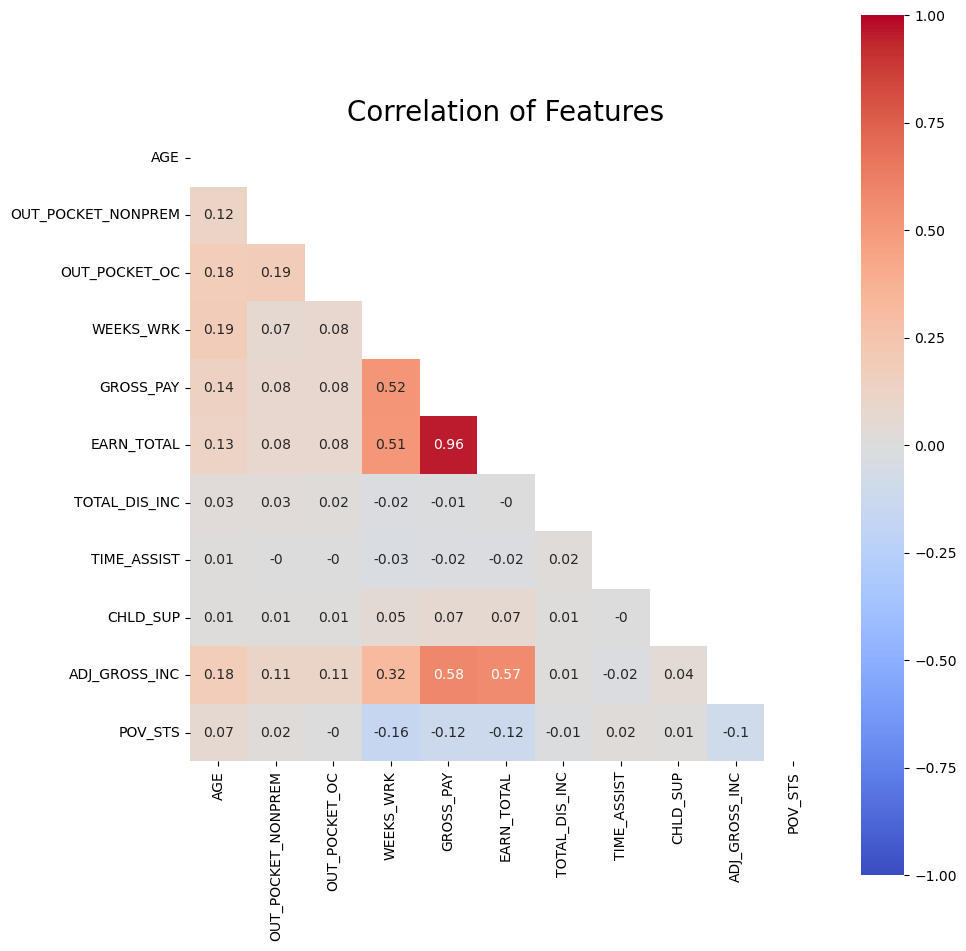

In [107]:
#Plot heatmap presenting correlation of numeric variables
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 10))
plt.title('Correlation of Features', size=20)
corr = round(df[numeric_columns].corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, cmap = 'coolwarm',mask = mask, square = True,vmin=-1,vmax=1)
plt.tight_layout()
plt.savefig("../images/eda/correlation_heatmap");

Correlation of chosen numerical features. As expected, weeks worked, adjusted gross income, gross pay, and earn total are highly correlated with one other. Additionally, there appears to be some positive correlation between age and out of pocket medical expenses. 

### Chi Square Analysis

In [69]:
# chi-square test statistically assesses the independence the association between two categorical columns
# https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/8-chi-squared-tests
# https://en.wikipedia.org/wiki/Chi-squared_test

total_categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
target_column = 'POV_STS'

for col in total_categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target_column])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test: {col} vs. {target_column}')
    print(f'Chi-square statistic: {chi2}')
    print(f'P-value: {p}')
    print('==' * 25)

Chi-square test: STATE vs. POV_STS
Chi-square statistic: 653.211582988905
P-value: 7.101074488263979e-105
Chi-square test: FAM_RELATIONSHIP vs. POV_STS
Chi-square statistic: 3145.7345429425354
P-value: 0.0
Chi-square test: OCCUPATION vs. POV_STS
Chi-square statistic: 2476.072698288902
P-value: 0.0
Chi-square test: EDU_LVL vs. POV_STS
Chi-square statistic: 2548.5691557376836
P-value: 0.0
Chi-square test: MARITAL vs. POV_STS
Chi-square statistic: 1588.457238922911
P-value: 0.0
Chi-square test: SEX vs. POV_STS
Chi-square statistic: 17.77593010155604
P-value: 2.4850728361130094e-05
Chi-square test: HOUSEHOLD_SUMMARY vs. POV_STS
Chi-square statistic: 1902.2362478752243
P-value: 0.0
Chi-square test: MILITARY vs. POV_STS
Chi-square statistic: 556.9448980434644
P-value: 1.150673278409702e-121
Chi-square test: CERT_REQ vs. POV_STS
Chi-square statistic: 755.9829846253631
P-value: 6.92437663445168e-165
Chi-square test: TROUB_BATHE vs. POV_STS
Chi-square statistic: 851.4728702052277
P-value: 1.273

Chi-square test on categorical variables and target variable. Lower p-values correspond to likely association between the two features compared. 

### Contingency Tables

In [70]:
for col in total_categorical_columns:
    table = pd.crosstab(df[col], df[target_column])
    print(f'Contingency Table between {col} and {target_column}:')
    display(table)

Contingency Table between STATE and POV_STS:


POV_STS,in poverty,not in poverty
STATE,,
Arizona,26,214
Abroad,163,360
Alabama,32,187
Alaska,6,91
Arkansas,23,284
California,133,1000
Colorado,17,242
Connecticut,6,56
Delaware,13,75


Contingency Table between FAM_RELATIONSHIP and POV_STS:


POV_STS,in poverty,not in poverty
FAM_RELATIONSHIP,,
child,2385,45358
not fam,3943,22376
other relatives,683,5470
ref person,2711,39683
spouse,1426,28697


Contingency Table between OCCUPATION and POV_STS:


POV_STS,in poverty,not in poverty
OCCUPATION,,
Business/Finance,258,12966
Professional,415,17343
Service,935,11501
construction,309,3841
farming,57,542
maintenance,79,2237
military,1,3
none,7954,70295
office,283,7378


Contingency Table between EDU_LVL and POV_STS:


POV_STS,in poverty,not in poverty
EDU_LVL,,
associate degree,745,10673
bachelor's degree,1193,23245
children,1417,30196
college no degree,1500,17240
doctorate degree,76,2206
elementary school,484,1684
high school graduate,3373,30127
high school no diploma,1501,11843
master's degree,403,10267


Contingency Table between MARITAL and POV_STS:


POV_STS,in poverty,not in poverty
MARITAL,,
divorced,1319,10171
married/civilian spouse,2846,56985
married/estranged,228,1473
married/military spouse,6,409
seperated,291,1790
single,5511,64891
widowed,947,5865


Contingency Table between SEX and POV_STS:


POV_STS,in poverty,not in poverty
SEX,,
female,5914,72168
male,5234,69416


Contingency Table between HOUSEHOLD_SUMMARY and POV_STS:


POV_STS,in poverty,not in poverty
HOUSEHOLD_SUMMARY,,
child/never married,1405,33051
group living,4,30
householder,5334,53781
non-relative,1188,6519
over 18,873,10871
relative,990,9643
spouse of HH,1351,27585
under 18/ever married,3,104


Contingency Table between MILITARY and POV_STS:


POV_STS,in poverty,not in poverty
MILITARY,,
ineligible,1686,35127
no,8945,99235
yes,517,7222


Contingency Table between CERT_REQ and POV_STS:


POV_STS,in poverty,not in poverty
CERT_REQ,,
no,107,2621
none,10739,124209
yes,302,14754


Contingency Table between TROUB_BATHE and POV_STS:


POV_STS,in poverty,not in poverty
TROUB_BATHE,,
no,9277,108905
not included,1432,30686
yes,439,1993


Contingency Table between TROUB_HEAR and POV_STS:


POV_STS,in poverty,not in poverty
TROUB_HEAR,,
no,9204,107081
none,1432,30686
yes,512,3817


Contingency Table between TROUB_SEE and POV_STS:


POV_STS,in poverty,not in poverty
TROUB_SEE,,
no,9340,109031
none,1432,30686
yes,376,1867


Contingency Table between TROUB_ALONE and POV_STS:


POV_STS,in poverty,not in poverty
TROUB_ALONE,,
no,8835,106737
none,1432,30686
yes,881,4161


Contingency Table between TROUB_WALK and POV_STS:


POV_STS,in poverty,not in poverty
TROUB_WALK,,
no,8455,104269
none,1432,30686
yes,1261,6629


Contingency Table between TROUB_CONC and POV_STS:


POV_STS,in poverty,not in poverty
TROUB_CONC,,
no,8926,106824
none,1432,30686
yes,790,4074


Contingency Table between HISPANIC and POV_STS:


POV_STS,in poverty,not in poverty
HISPANIC,,
no,7973,114059
yes,3175,27525


Contingency Table between IMMIGR_YR and POV_STS:


POV_STS,in poverty,not in poverty
IMMIGR_YR,,
1950s,61,314
1960s,111,779
1970s,228,1478
1980s,359,2769
1990s,443,3928
2000s,612,4920
2010s,703,5403
2020s,295,756
before 1950,13,55


Contingency Table between CITIZENSHIP and POV_STS:


POV_STS,in poverty,not in poverty
CITIZENSHIP,,
native,8542,123119
non citizen,1605,9232
non native citizen,1001,9233


Contingency Table between DISABLED and POV_STS:


POV_STS,in poverty,not in poverty
DISABLED,,
no,7586,98313
not included,1432,30686
yes,2130,12585


Contingency Table between RACE and POV_STS:


POV_STS,in poverty,not in poverty
RACE,,
Black-Asian,4,58
White-AI-HP,1,12
AI-Asian,1,27
AI-HP,0,9
American Indian or Alaskan Native only,259,2208
Asian only,904,9235
Asian-HP,16,145
Black only,2135,16306
Black-AI,13,129


Contingency Table between WORK_INDUSTRY and POV_STS:


POV_STS,in poverty,not in poverty
WORK_INDUSTRY,,
"Agriculture, forestry, fishing, and hunting",98,1282
"Professional, scientific, management and administrative, and waste management services",394,8636
"Arts, entertainment, recreation and accomodation, and food services",490,6115
Construction,359,5212
"Educational services, and health care and social assistance",551,16499
"Finance and insurance, and real estate and rental and leasing",103,4795
Information,40,1200
Manufacturing,211,6803
Military,1,3


Contingency Table between LABOR_STATUS and POV_STS:


POV_STS,in poverty,not in poverty
LABOR_STATUS,,
disabled,1167,4552
employed/absent,130,2055
employed/at work,2621,66408
not applicable,1432,30686
not in labor force/other,2527,16131
retired,2882,19492
unemployed,37,374
unemployed/looking,352,1886


Contingency Table between WRK_STATUS and POV_STS:


POV_STS,in poverty,not in poverty
WRK_STATUS,,
Child,1432,30686
FT hours,1562,51550
"FT hours, usually PT for economic reasons",5,52
"FT hours, usually PT for non-economic reasons",15,254
"Not at work, usually FT",68,1420
"Not at work, usually part-time",62,635
Not in labor force,6576,40175
"PT for economic reasons, usually FT",51,583
"PT for non-economic reasons, usually FT",124,3597


Contingency Table between WRK_CLASS_LONGEST and POV_STS:


POV_STS,in poverty,not in poverty
WRK_CLASS_LONGEST,,
federal,32,2656
local,83,4758
no pay,4,34
no weeks,8454,68600
private,1985,54920
self employed inc,60,2633
self employed not inc,427,4100
state,103,3883


Contingency Table between LONGEST_IND and POV_STS:


POV_STS,in poverty,not in poverty
LONGEST_IND,,
0,1417,30196
Accommodations and food service,341,4866
"Agriculture, forestry, fishing, and hunting",89,1271
"Arts, entertainment, and recreation",73,1475
Construction,302,5191
Durable goods manufacturing,88,4418
Educational services,194,6726
Finance and insurance,46,3386
Health care and social assistance,268,10090


Contingency Table between NO_WRK_RSN and POV_STS:


POV_STS,in poverty,not in poverty
NO_WRK_RSN,,
could not find work,368,727
going to school,1084,7951
ill or disabled,1530,5276
not applicable,4111,103180
other,332,634
retired,2727,18108
taking care of home,996,5708


Contingency Table between FT_PT and POV_STS:


POV_STS,in poverty,not in poverty
FT_PT,,
ft all year,968,52077
ft part year,619,8157
nonworker,7037,38404
pt all year,413,6617
pt part year,694,6133
under 15,1417,30196


Contingency Table between EARN_SOURCE and POV_STS:


POV_STS,in poverty,not in poverty
EARN_SOURCE,,
farm/self employment,31,317
no pay,4,34
self employment,396,3783
unemployed,8454,68600
wage,2263,68850


Contingency Table between ERN_OTR and POV_STS:


POV_STS,in poverty,not in poverty
ERN_OTR,,
no,2483,65946
under 15,8454,68600
yes,211,7038


Contingency Table between WORK_DIS and POV_STS:


POV_STS,in poverty,not in poverty
WORK_DIS,,
no,8069,102761
under 15,1417,30196
yes,1662,8627


Contingency Table between DIS_INC and POV_STS:


POV_STS,in poverty,not in poverty
DIS_INC,,
other or don't know,19,283
US military retirement disability,3,80
US railroad retirement disability,0,8
accident or disability insurance,6,117
company or union disability,8,212
did not receive,11092,140477
federal government disability,5,72
state or local gov't employee disability,11,181
state temporary sickness,1,16


Contingency Table between OTH_DIS_INC and POV_STS:


POV_STS,in poverty,not in poverty
OTH_DIS_INC,,
other or don't know,0,1
US military retirement disability,0,1
US railroad retirement disability,0,1
accident or disability insurance,0,5
company or union disability,0,1
did not receive,11148,141571
state or local gov't employee disability,0,4


Contingency Table between FIN_ASSIST and POV_STS:


POV_STS,in poverty,not in poverty
FIN_ASSIST,,
no,9444,110629
under 15,1417,30196
yes,287,759


Contingency Table between OTH_INC and POV_STS:


POV_STS,in poverty,not in poverty
OTH_INC,,
afdc,1,25
alimony,4,69
annuities or paid up insurance policies,1,9
anything else,54,1028
dividends,0,1
estates or trusts,0,1
interest,0,1
no other source,11086,140400
other public assistance,0,14


Contingency Table between CASH_ASSIST and POV_STS:


POV_STS,in poverty,not in poverty
CASH_ASSIST,,
TANF/AFDC,78,386
both,2,29
other,36,224
under 15,11032,140945


Contingency Table between WIC and POV_STS:


POV_STS,in poverty,not in poverty
WIC,,
no,2428,35495
not eligible,8617,104885
yes,103,1204


Contingency Table between TAX_FILE_STAT and POV_STS:


POV_STS,in poverty,not in poverty
TAX_FILE_STAT,,
head of HH,804,7468
joint 1p over 65 y/o,364,4464
joint both ov 65 y/o,844,10692
joint under 65 y/o,1478,42218
nonfiler,2989,39055
single,4669,37687


Contingency Table between HEALTH_INS and POV_STS:


POV_STS,in poverty,not in poverty
HEALTH_INS,,
infant,15,256
no,2003,10238
yes,9130,131090


Contingency Table between PUB_INS and POV_STS:


POV_STS,in poverty,not in poverty
PUB_INS,,
covered all year,6289,45811
infant,15,256
no coverage,4613,93485
some coverage,231,2032


Contingency Table between PRIV_INS and POV_STS:


POV_STS,in poverty,not in poverty
PRIV_INS,,
covered all year,3266,92588
infant,15,256
no coverage,7554,44256
some coverage,313,4484


Contingency Table between POV_STS and POV_STS:


POV_STS,in poverty,not in poverty
POV_STS,,
in poverty,11148,0
not in poverty,0,141584


Contingency Table between POV_LVL and POV_STS:


POV_STS,in poverty,not in poverty
POV_LVL,,
100-124 percent of poverty level,873,4949
125-149 percent of poverty level,595,5796
150+ percent of poverty level,915,121472
below poverty level,8738,9098
not in poverty,27,269


Breakdown of POV_STS count by categorical features selected. 

## Data Visualization<a id='dv'></a>
---

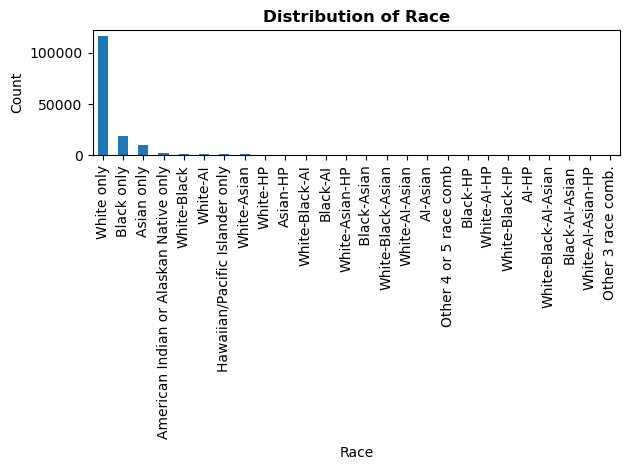

In [108]:
custom_bar_plot('RACE','Race')

Distribution of Race. Majority of people are cliassified as White only.

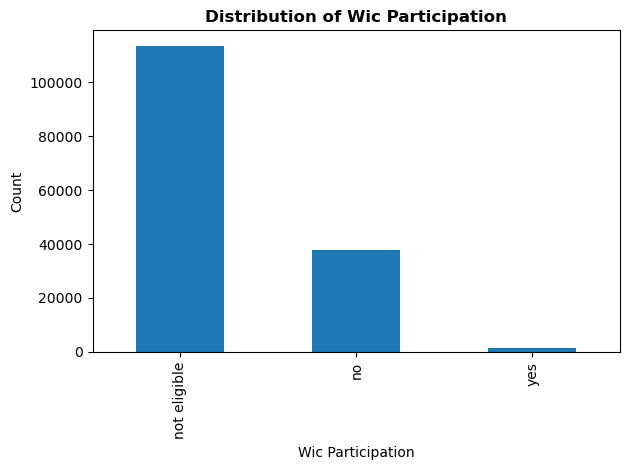

In [109]:
custom_bar_plot('WIC','Wic Participation')

Distribution of WIC Participation. Majority of people are not eligible.

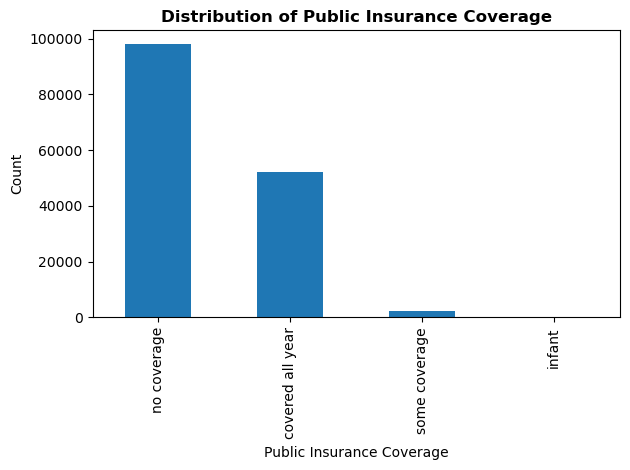

In [110]:
custom_bar_plot('PUB_INS','Public Insurance Coverage')

Distribution of Public Insurance Coverage. Majority of people do not possess Public Insurance but a large amount do have coverage all year.

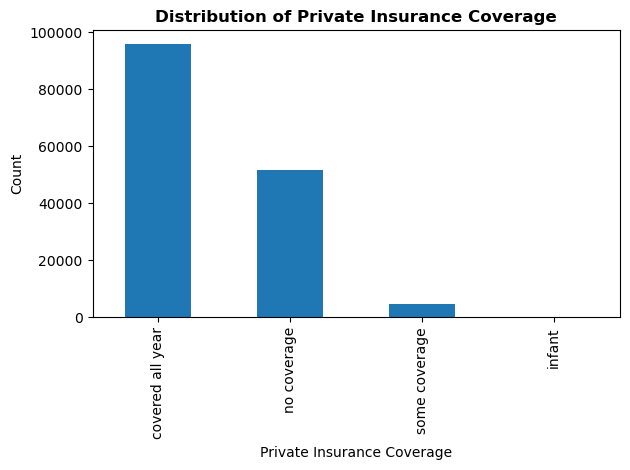

In [111]:
custom_bar_plot('PRIV_INS','Private Insurance Coverage')

Distribution of Private Insurance Coverage. Majority of people possess Private Insurance but a large amount do not have private coverage at all.

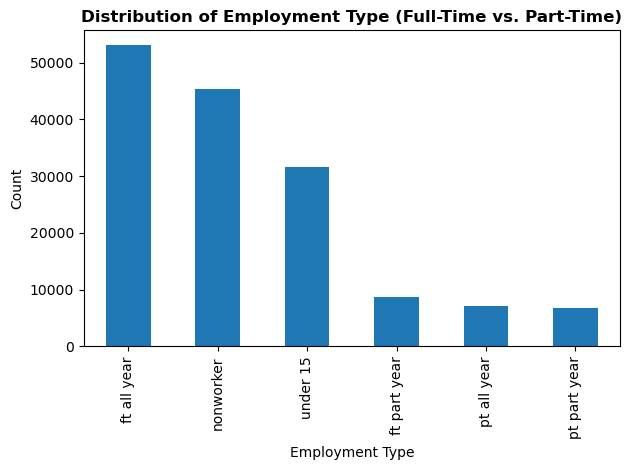

In [112]:
custom_bar_plot('FT_PT','Employment Type','Employment Type (Full-Time vs. Part-Time)')

Distribution of Employment Type. The most prominent categories are full-time yearly workers, non-workers, and children.

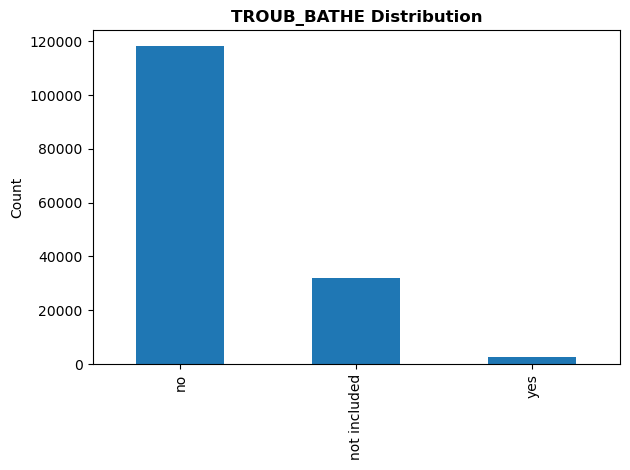

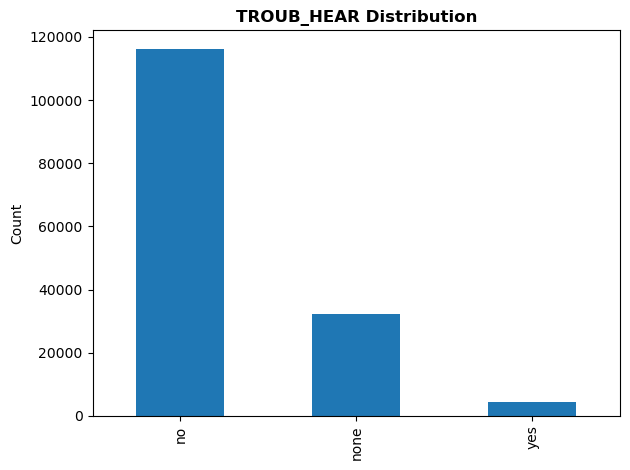

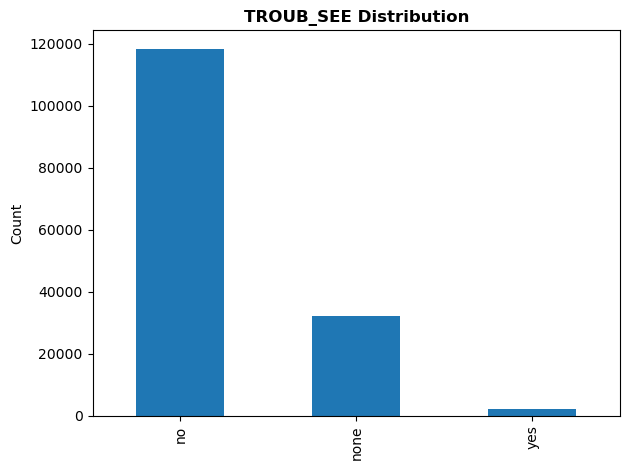

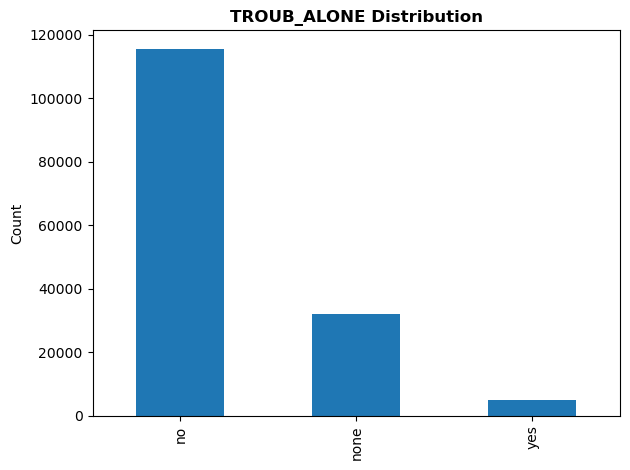

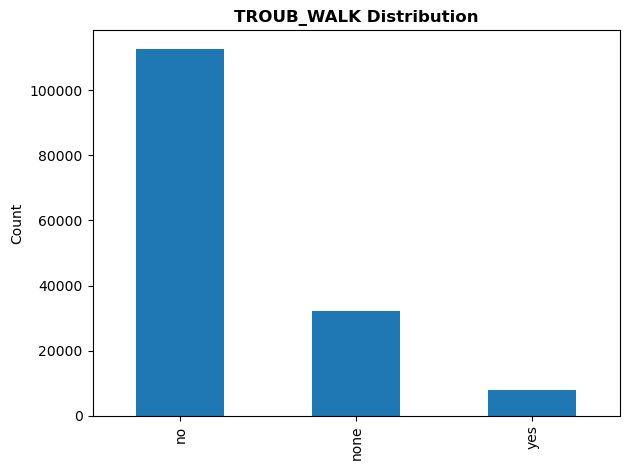

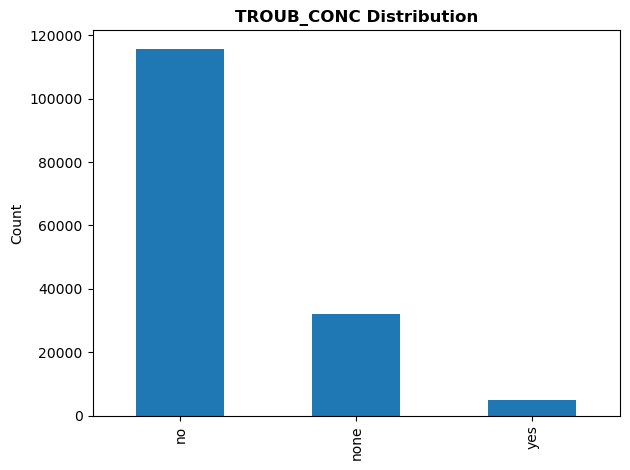

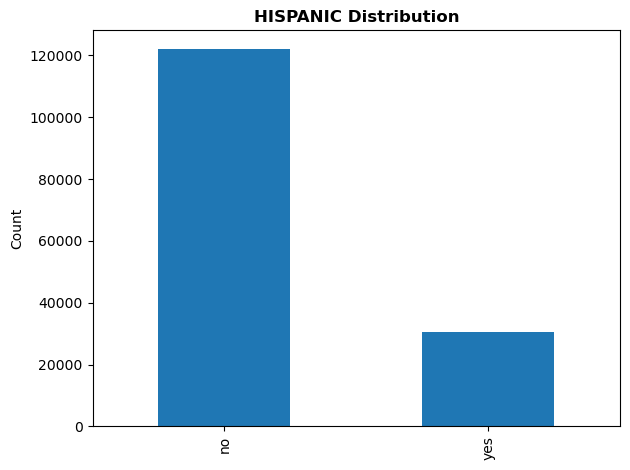

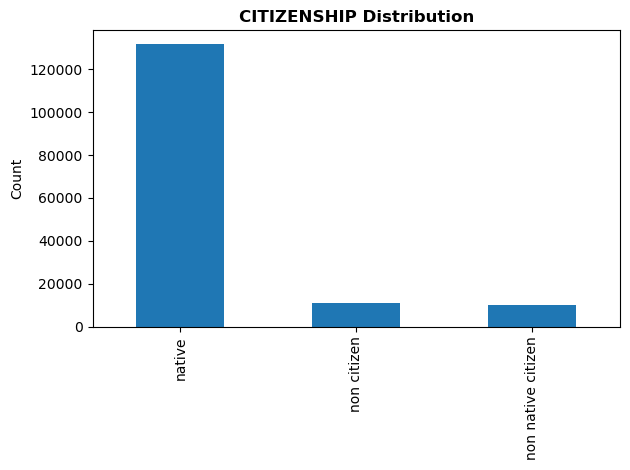

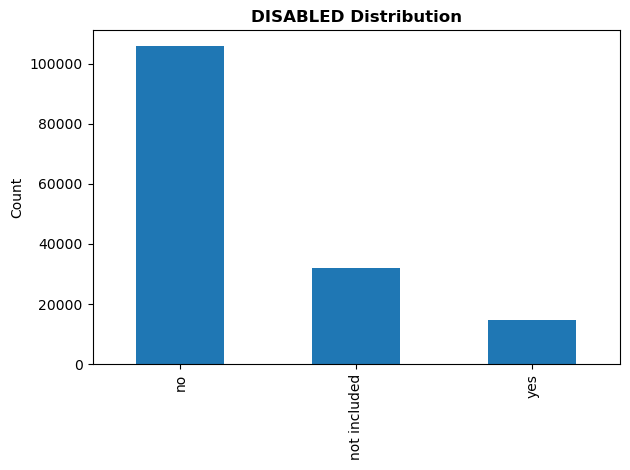

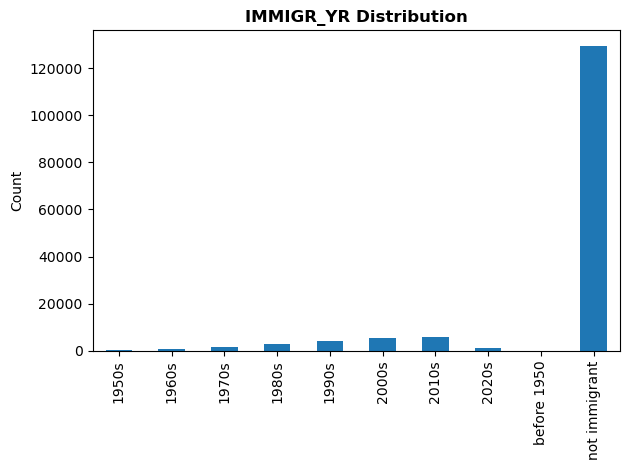

In [113]:
#create plots for various categroical features
categorical_columns = ['TROUB_BATHE', 'TROUB_HEAR', 'TROUB_SEE', 
                       'TROUB_ALONE', 'TROUB_WALK', 'TROUB_CONC', 
                       'HISPANIC', 'CITIZENSHIP', 'DISABLED', 
                       'IMMIGR_YR']

for col in categorical_columns:
    if col != 'IMMIGR_YR':
        df[col].value_counts().plot(kind = 'bar')
    else:
        df[col].value_counts().sort_index().plot(kind = 'bar')
    plt.title(f'{col} Distribution',fontweight='bold')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f'../images/eda/{col}_distribution.png')
    plt.show()
    print('\n'*2);

* Distributions of several caetegorical features.
* Majority of people do not have trouble performing basic functions and are not disabled.
* Most are native and not Hispanic.

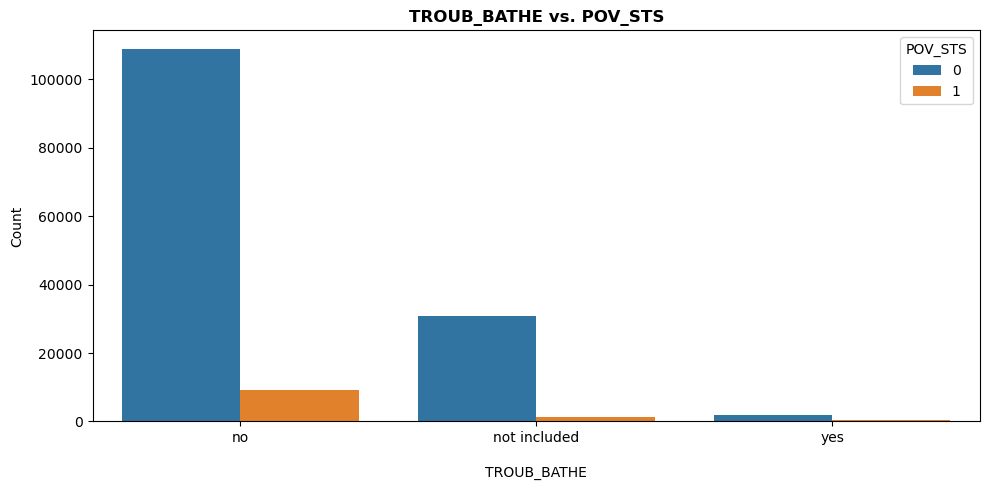

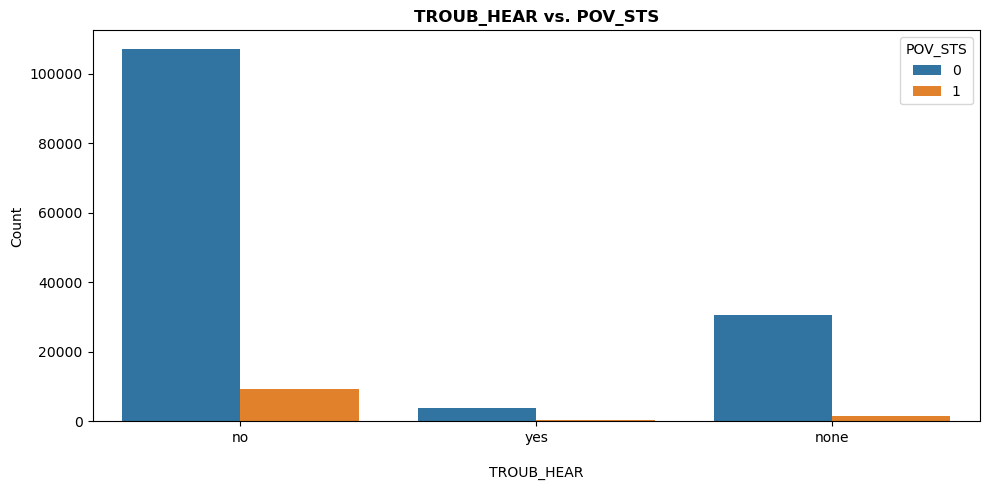

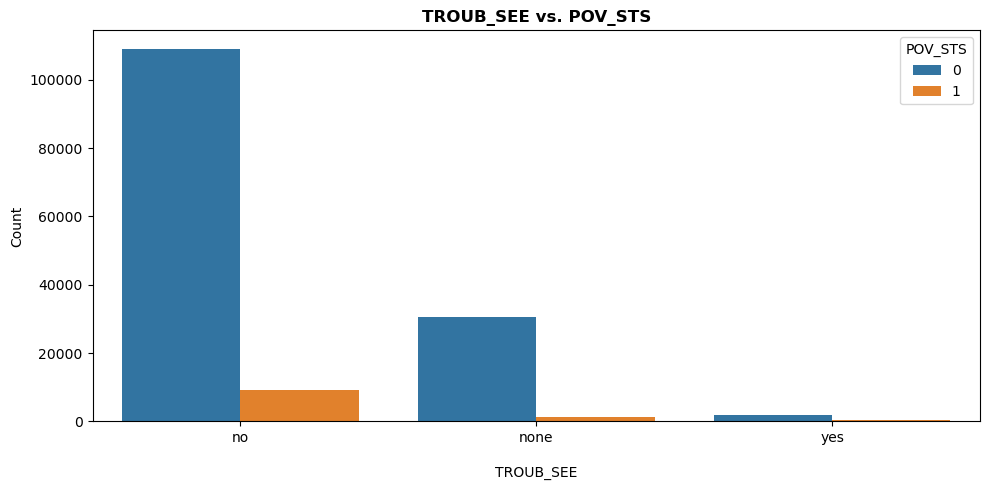

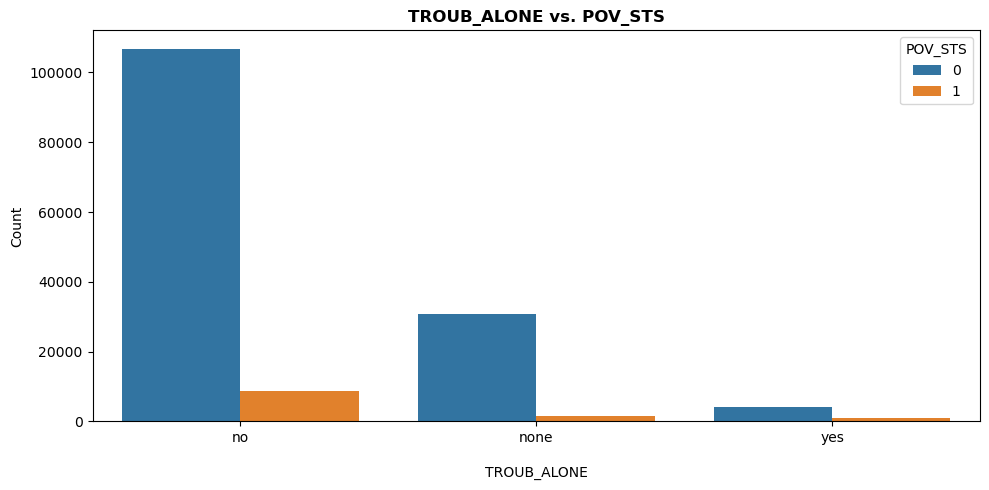

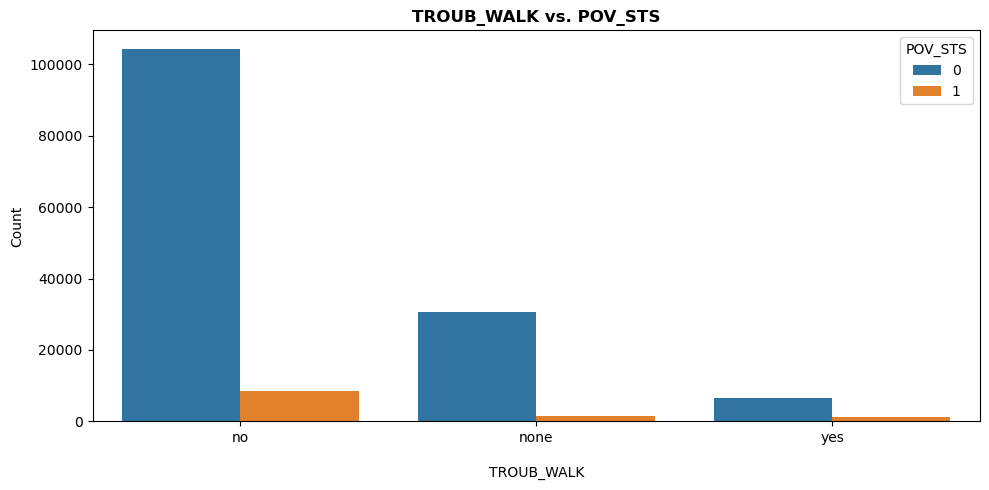

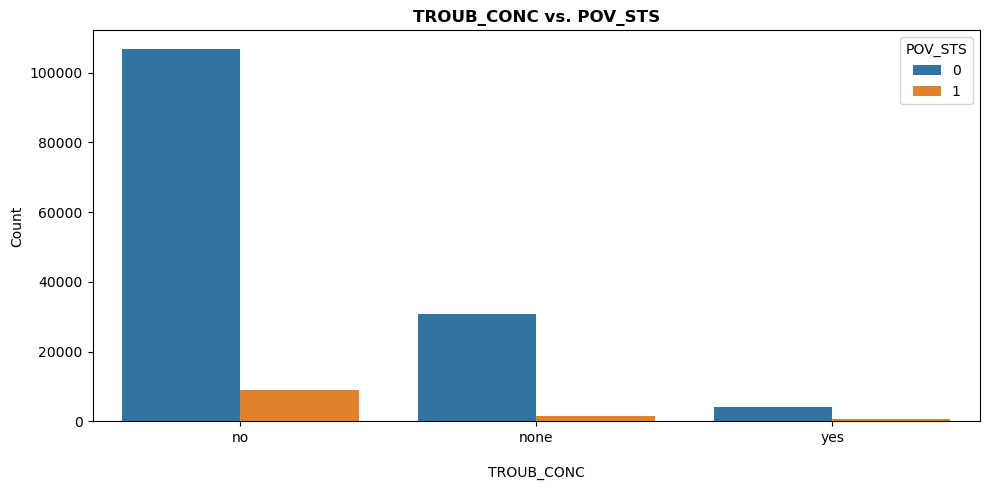

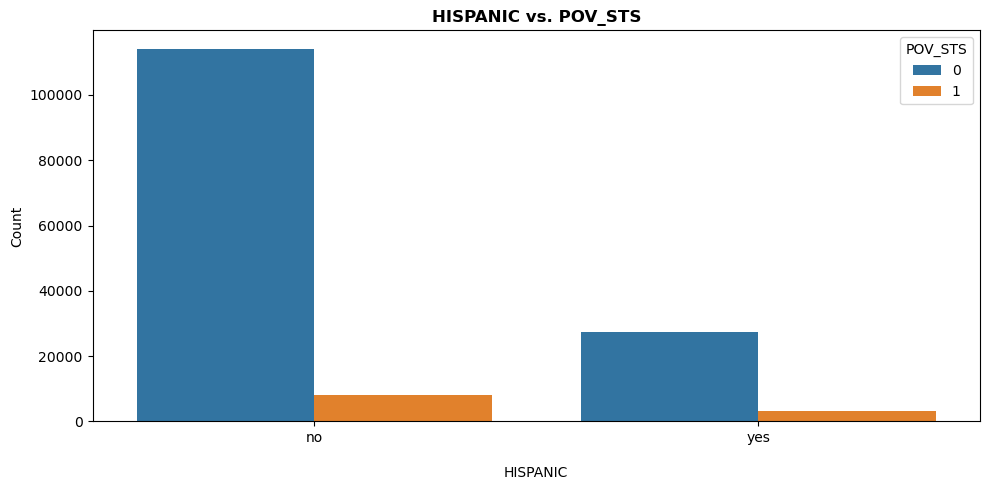

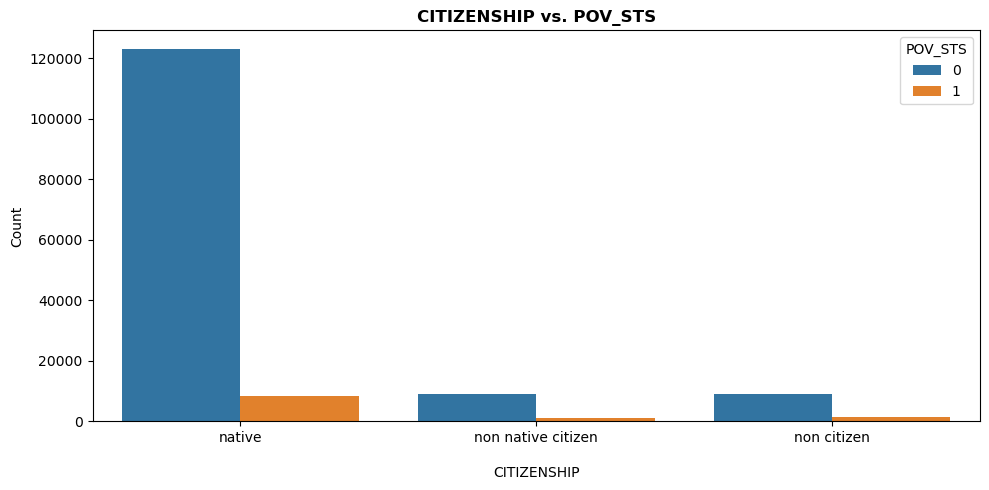

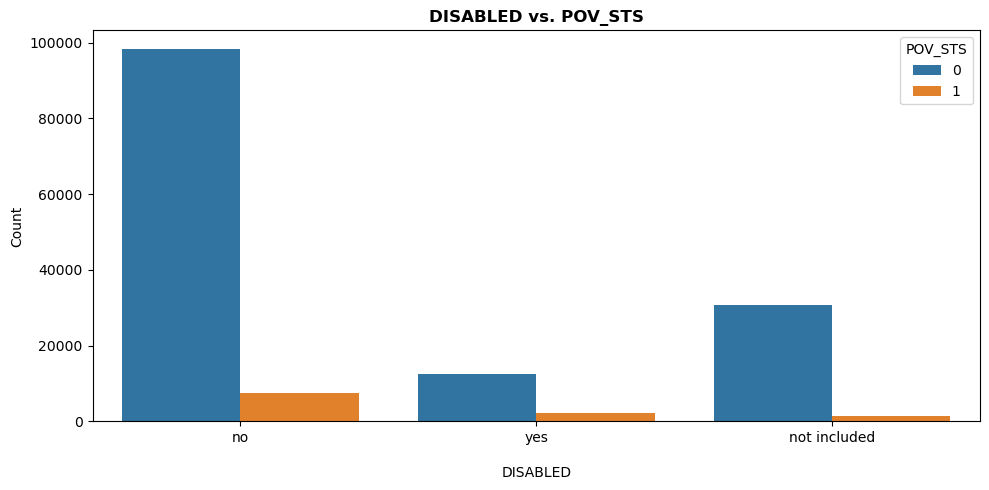

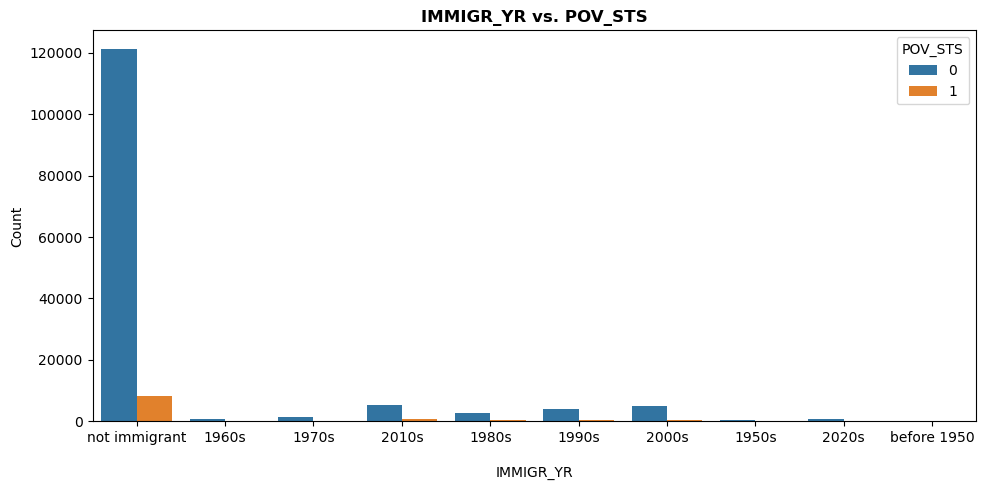

In [114]:
for col in categorical_columns:
    plt.figure(figsize = (10, 5))
    sns.countplot(x = col, hue = target_column, data = df)
    plt.title(f'{col} vs. {target_column}', fontweight = 'bold')
    plt.xlabel(col,labelpad = 15)
    plt.ylabel('Count')
    plt.legend(title = target_column)
    plt.tight_layout()
    plt.savefig(f'../images/eda/{col}_vs_{target_column}.png')
    plt.show()

* Comparison of previosuly seen categorical distributions with poverty status.
* Similar trends are noted between the two poverty status classes.

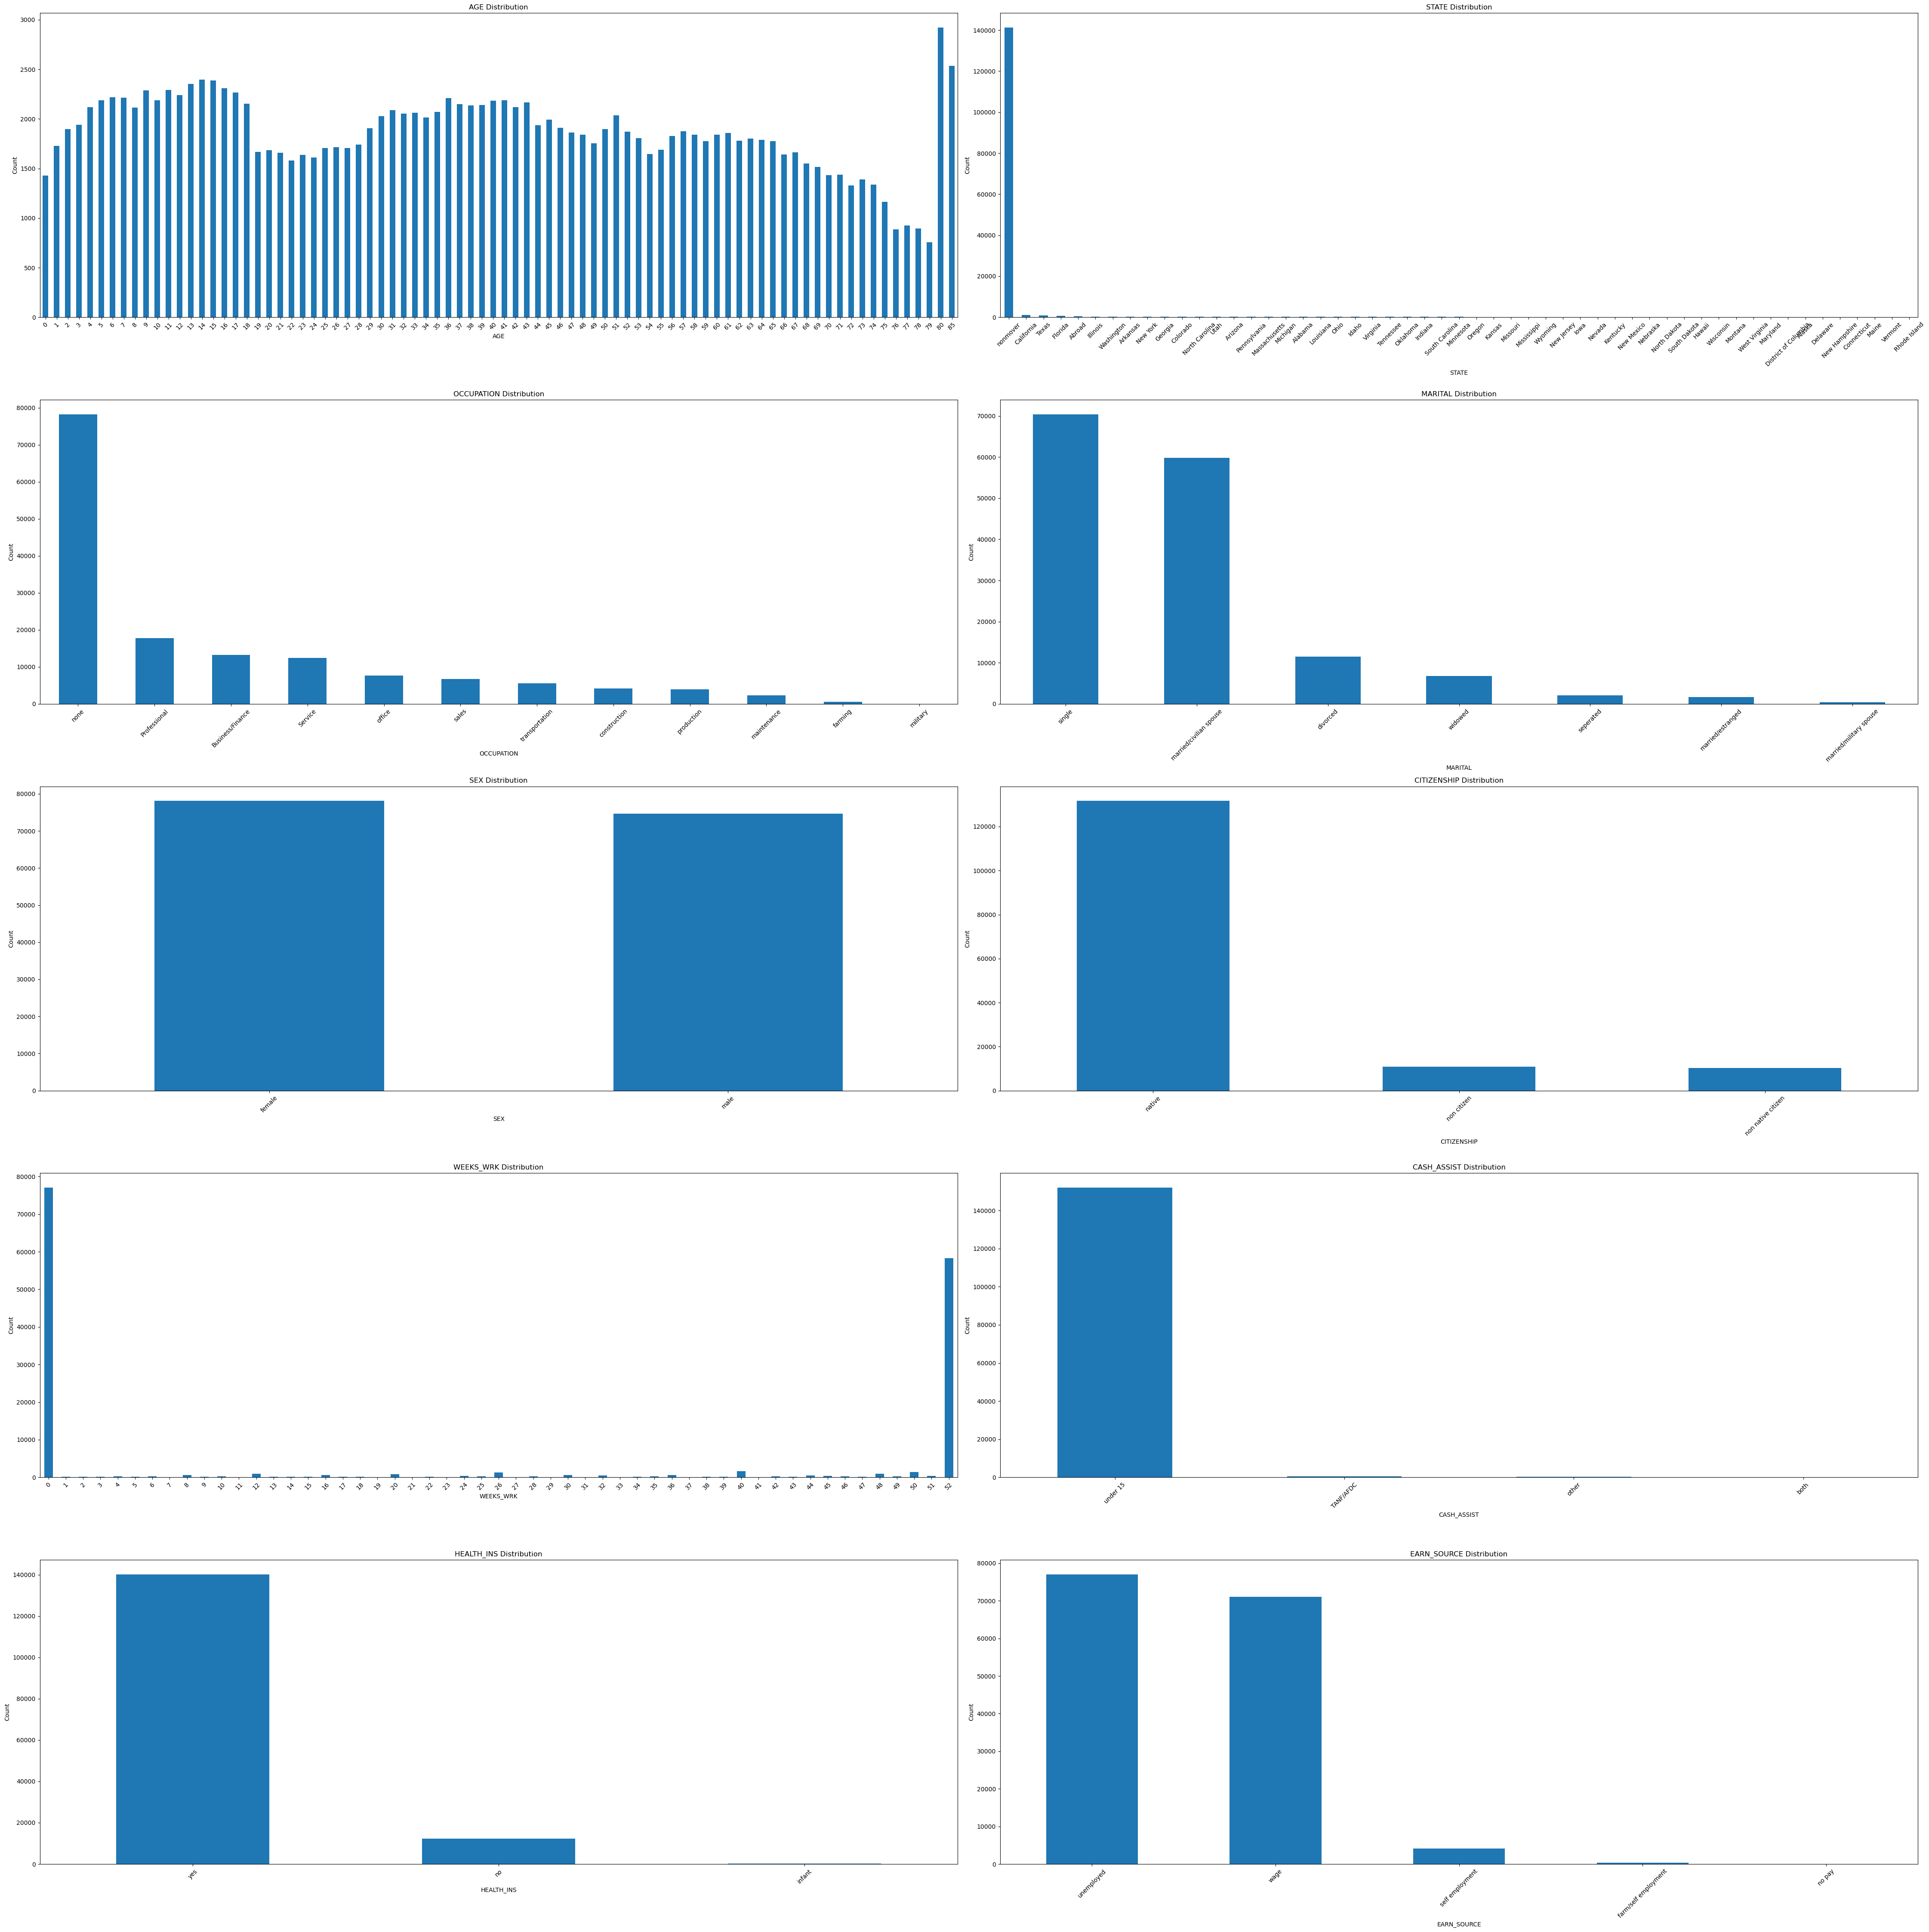

In [116]:
features = ['AGE', 'STATE', 'OCCUPATION', 'MARITAL', 'SEX', 'CITIZENSHIP', 'WEEKS_WRK', 'CASH_ASSIST', 'HEALTH_INS', 'EARN_SOURCE']

# Sorting the age and weeks worked columns in ascending order
df_sorted = df.sort_values(['AGE', 'WEEKS_WRK'])

# Plotting the distributions for each feature
plt.figure(figsize=(45, 45))

for i, feature in enumerate(features, 1):
    plt.subplot(5, 2, i)
    if feature in ['AGE', 'WEEKS_WRK']:
        feature_counts = df_sorted[feature].value_counts().sort_index()
    else:
        feature_counts = df[feature].value_counts()
    feature_counts.plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'{feature} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../images/eda/age_distribution_subplot.png')
plt.show()

Distribution of several categorical variables including age, state occupation, sex, and citizenship. 

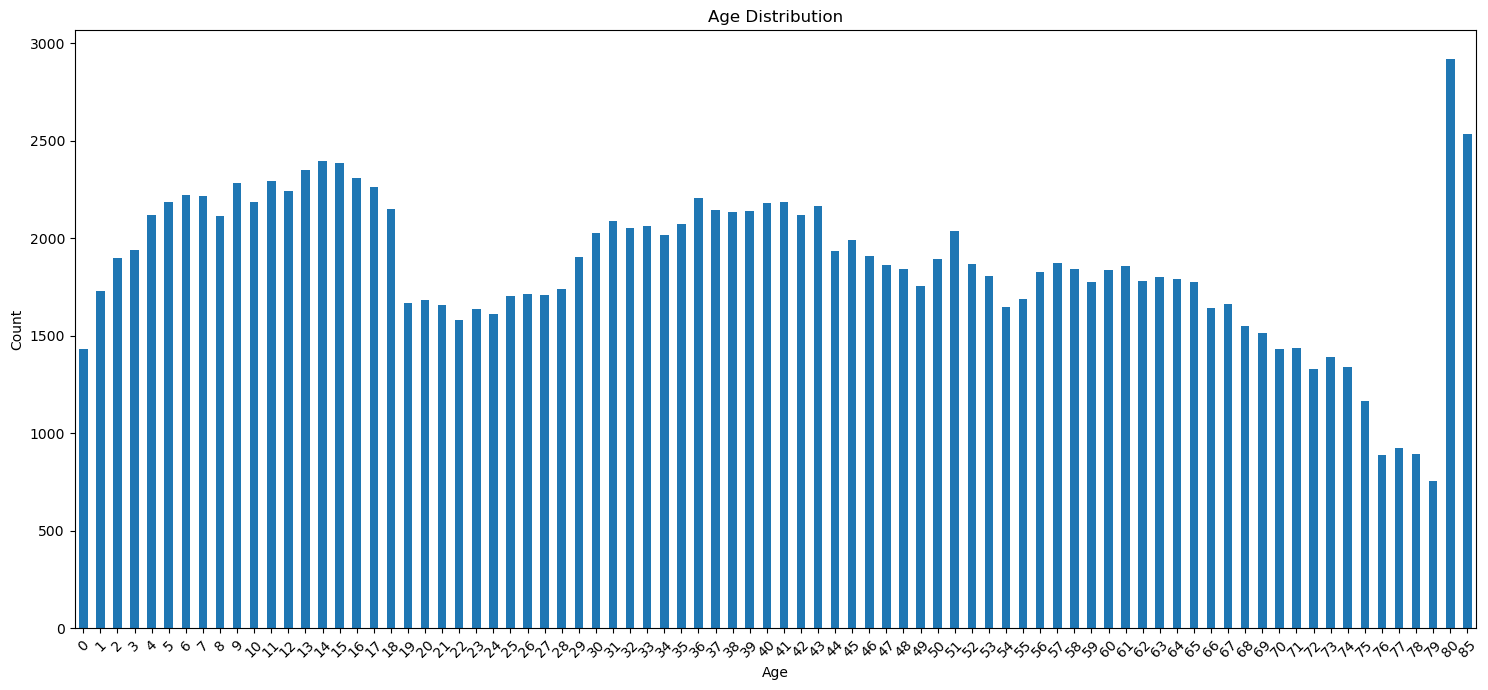

In [115]:
# Sorting the age column in ascending order
df_sorted = df.sort_values('AGE')

# Plotting the distribution of 'AGE'
plt.figure(figsize=(15, 7))
feature_counts = df_sorted['AGE'].value_counts().sort_index()
feature_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

# Saving the figure
plt.savefig('../images/eda/age_distribution.png')
plt.show()


This implies a significant presence of individuals in this particular age group within the sample, indicating potential insights into the characteristics, needs, and challenges of this segment of the population.

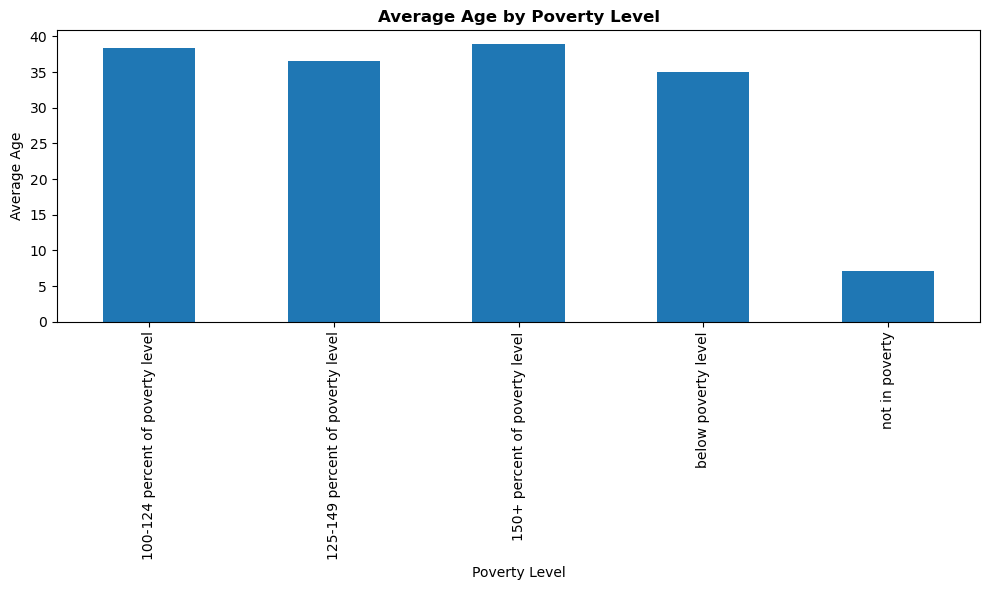

In [117]:
custom_bar_plot2(df.groupby('POV_LVL')['AGE'].mean(), 'Poverty Level', 'Average Age','Average Age by Poverty Level')

The bar plot shows that the average age for people below the poverty level is 35 years. This means that many people who are struggling financially are around this age. It's important to pay attention to their needs and find ways to help them overcome poverty and improve their lives

<Figure size 1000x600 with 0 Axes>

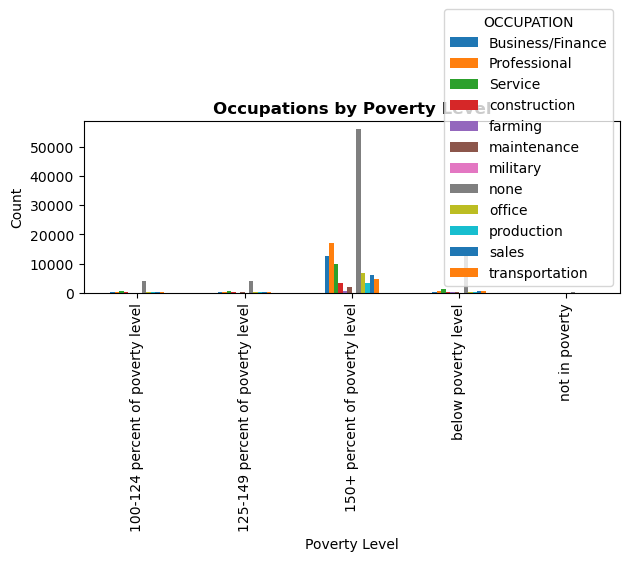

In [118]:
custom_bar_plot2(df.groupby(['POV_LVL', 'OCCUPATION']).size().unstack(), 'Poverty Level', 'Count',
                 'Occupations by Poverty Level')

Occupation by Poverty Level. Majority of individuals are 150%+ above poverty level. 

In [119]:
df['STATE'].value_counts()

nonmover                141272
California                1133
Texas                      842
Florida                    610
Abroad                     523
Illinois                   355
Washington                 329
Arkansas                   307
New York                   300
Georgia                    275
Colorado                   259
North Carolina             258
Utah                       256
 Arizona                   240
Pennsylvania               238
Massachusetts              236
Michigan                   232
Alabama                    219
Louisiana                  213
Ohio                       211
Idaho                      207
Virginia                   203
Tennessee                  199
Oklahoma                   189
Indiana                    186
South Carolina             182
Minnesota                  169
Oregon                     165
Kansas                     164
Missouri                   161
Mississippi                159
Wyoming                    156
New Jers

<Figure size 1000x600 with 0 Axes>

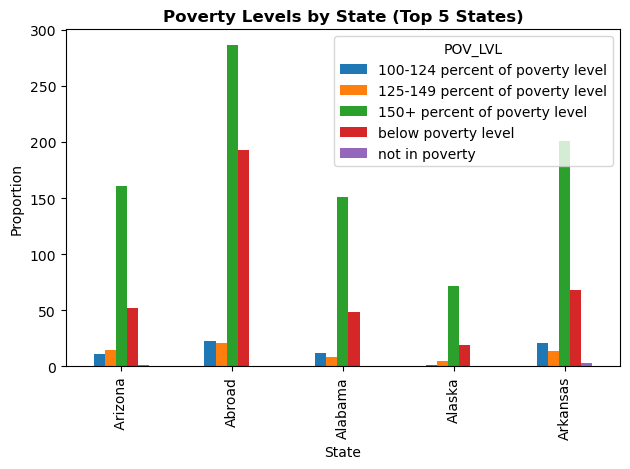

In [120]:
custom_bar_plot2(df.groupby(['STATE', 'POV_LVL']).size().unstack().head(),
         'State', 'Proportion', 'Poverty Levels by State (Top 5 States)')

Distribution of poverty level by previous state. Highest count of those below poverty threshold and above poverty threshold came from abroad.

<Figure size 1000x600 with 0 Axes>

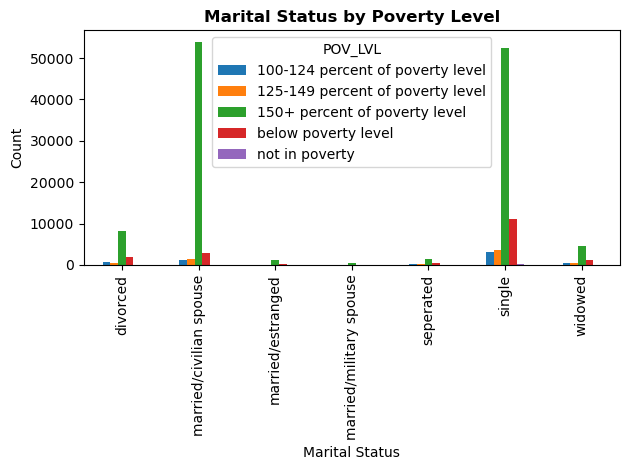

In [122]:
custom_bar_plot2(df.groupby(['MARITAL', 'POV_LVL']).size().unstack(),'Marital Status',
                 'Count', 'Marital Status by Poverty Level')

Distirubtion of Marital Statius by Poverty Level. Majority of people are married or single. Highest count of impoverished people are single.

<Figure size 1000x600 with 0 Axes>

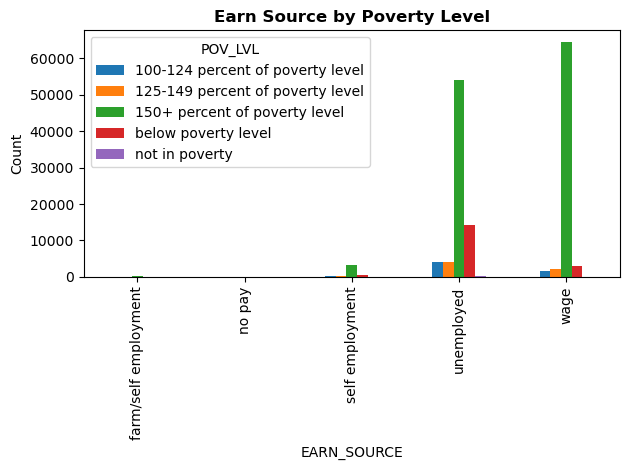

In [123]:
custom_bar_plot2(df.groupby(['EARN_SOURCE', 'POV_LVL']).size().unstack(),'EARN_SOURCE',
                 'Count', 'Earn Source by Poverty Level')

Earning Source by Poverty Level. Majority of individuals are unemployed or receive earnings from wages. 

<Figure size 1000x600 with 0 Axes>

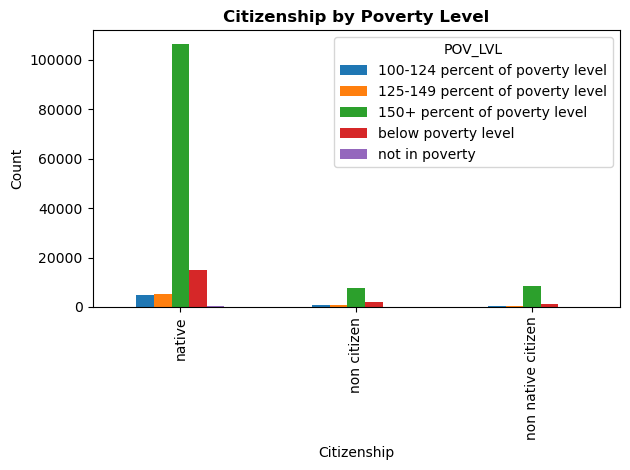

In [124]:
custom_bar_plot2(df.groupby(['CITIZENSHIP', 'POV_LVL']).size().unstack(),'Citizenship',
                 'Count', 'Citizenship by Poverty Level')

Citizenship by Povety Level. Majority of people in dataset are native. 

<Figure size 1000x600 with 0 Axes>

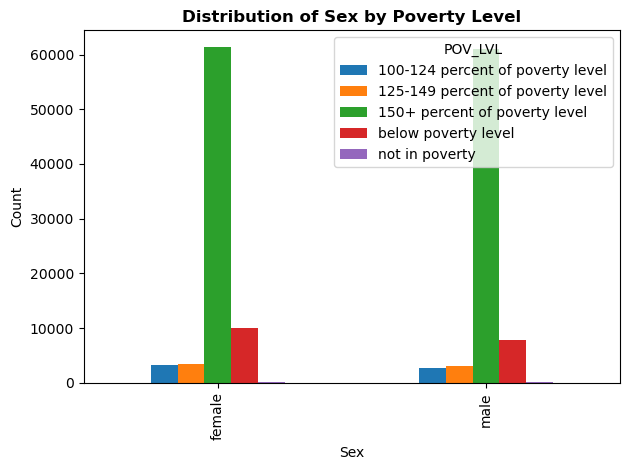

In [125]:
custom_bar_plot2(df.groupby(['SEX', 'POV_LVL']).size().unstack(),
         'Sex', 'Count', 'Distribution of Sex by Poverty Level')

Distribution of Sex by Poverty Level. Both sex classes are relatively equal across various poverty levels.

<Figure size 1000x600 with 0 Axes>

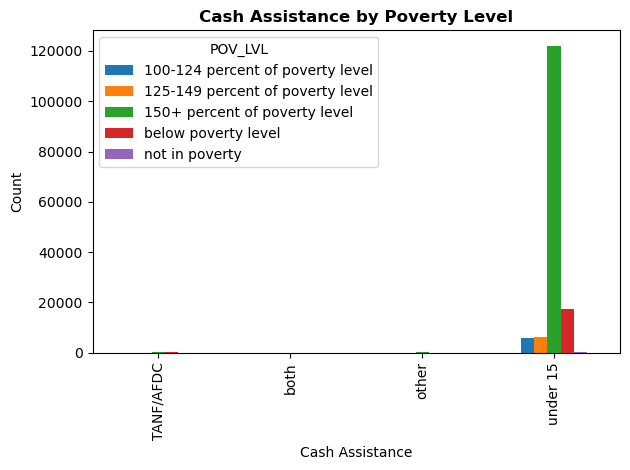

In [126]:
custom_bar_plot2(df.groupby(['CASH_ASSIST', 'POV_LVL']).size().unstack(),
         'Cash Assistance', 'Count', 'Cash Assistance by Poverty Level')

Cash assistance by Poverty Level. Vast majority of individuals are not recipients in this dataset. 

<Figure size 1000x600 with 0 Axes>

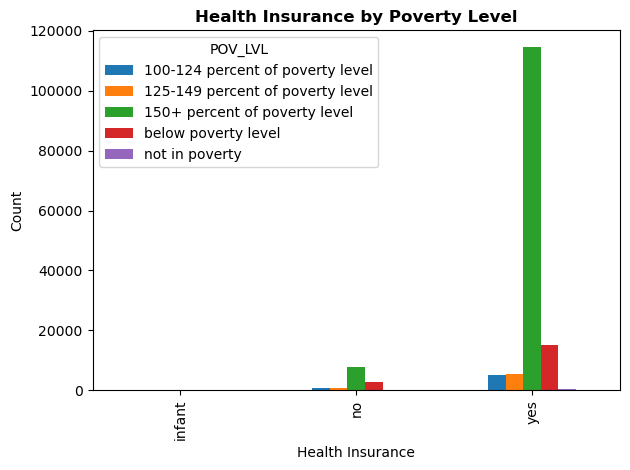

In [127]:
custom_bar_plot2(df.groupby(['HEALTH_INS', 'POV_LVL']).size().unstack(),
         'Health Insurance', 'Count', 'Health Insurance by Poverty Level')

Health Insurance by Poverty Level. Most people have health insurance in all poverty levels.

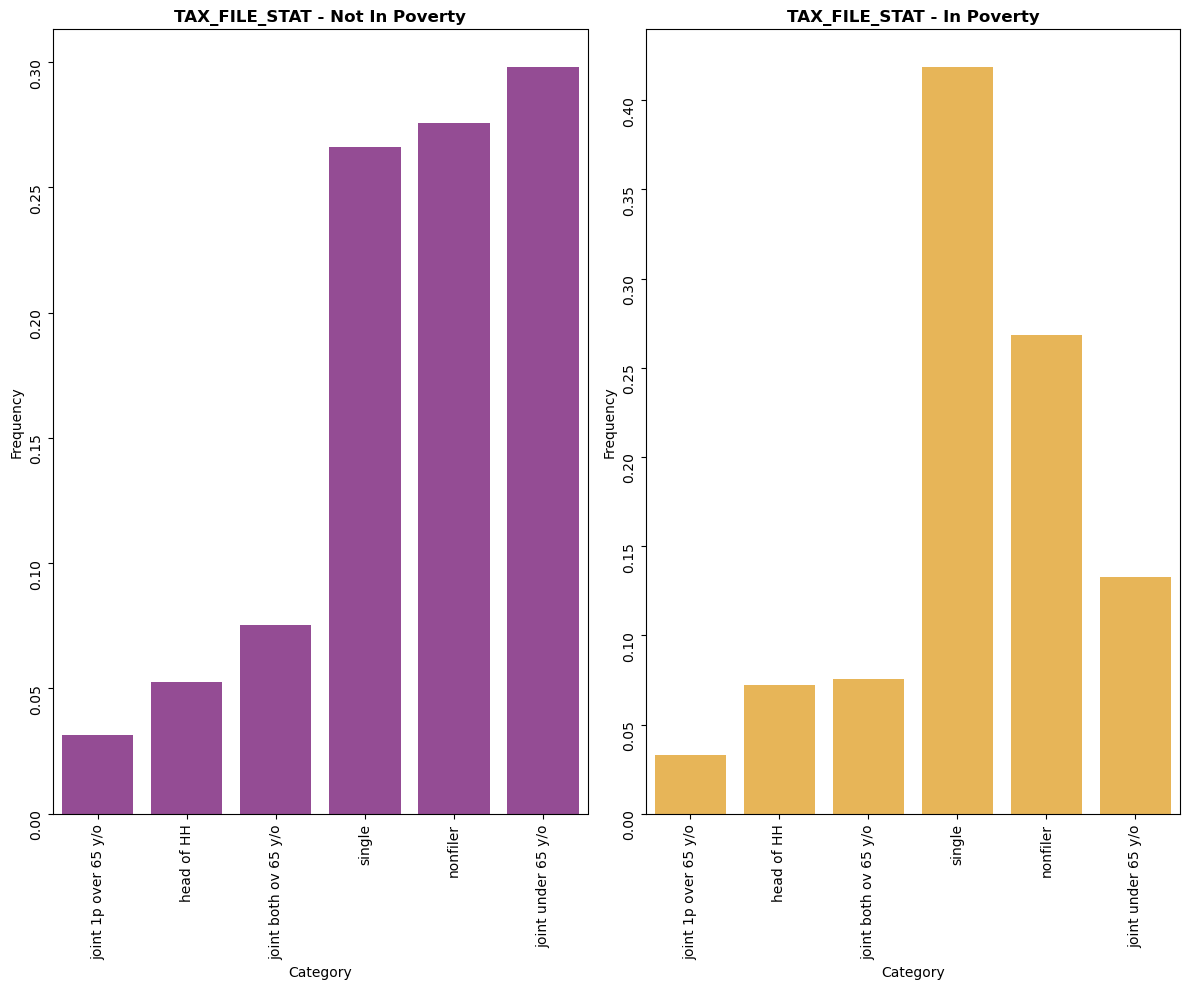

In [137]:
custom_frequency_plot("TAX_FILE_STAT", 'purple')

Distribution of Tax Filing Status by Poverty Status. Joint under 65 years old, nonfiler, and single status dominate those not in poverty whereas single individuals are dominant for those that have poverty.

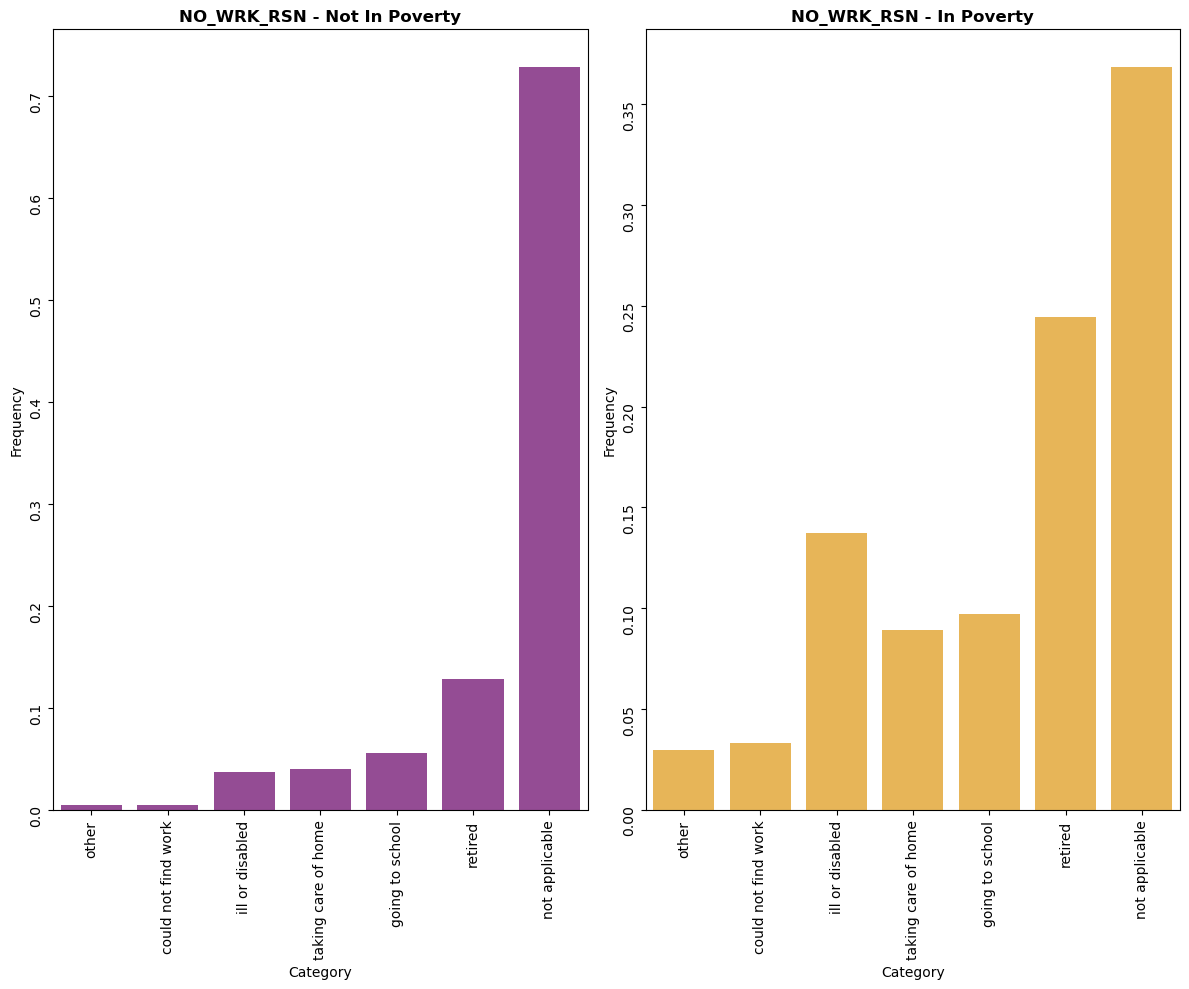

In [139]:
custom_frequency_plot("NO_WRK_RSN", 'purple')

Distribution of Reason for Not Working by Poverty Status. Majority is not applicable for both poverty classes but the disparity is much larger for those not in poverty.

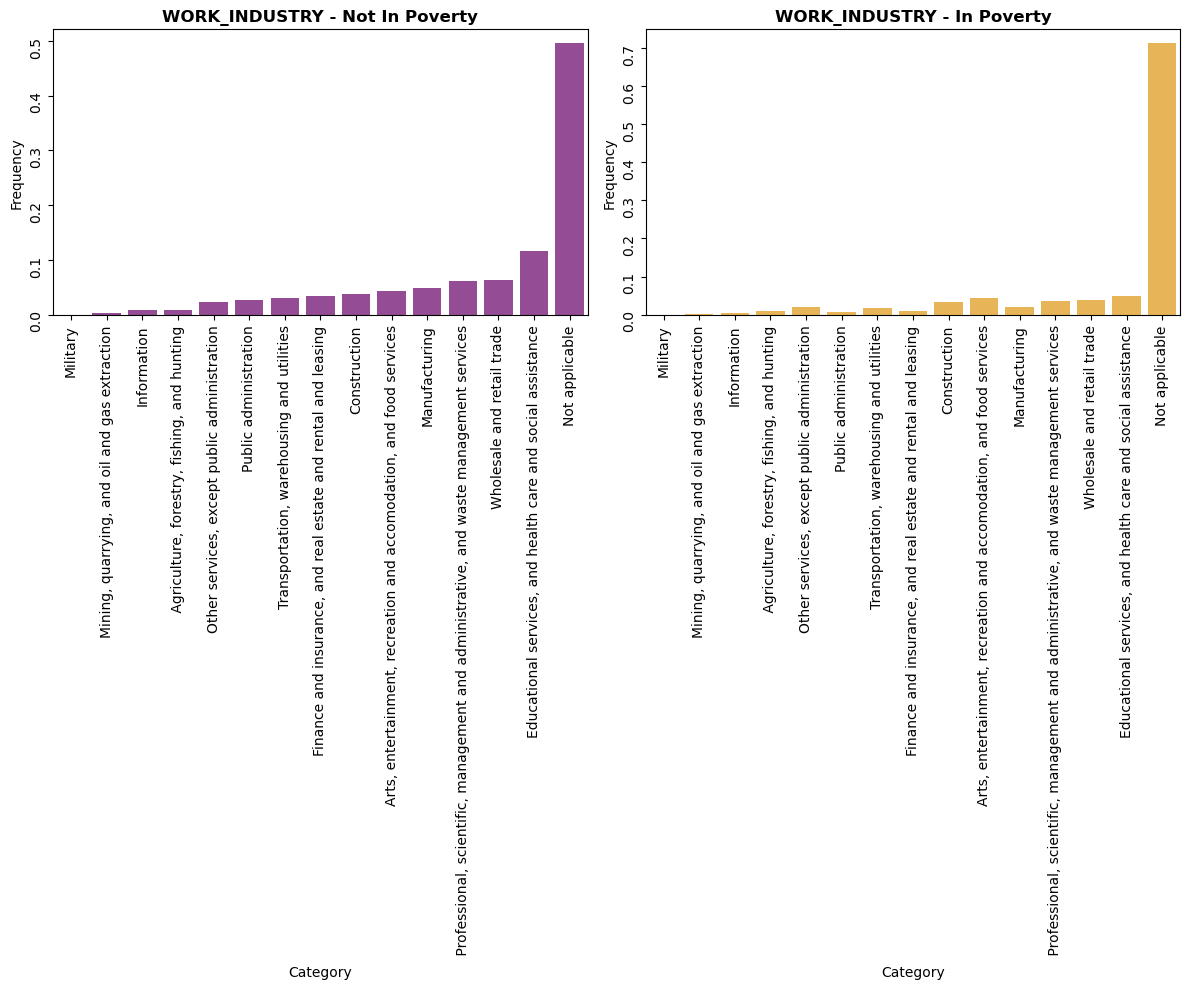

In [140]:
custom_frequency_plot("WORK_INDUSTRY", 'purple')

In [82]:
df.groupby("POV_STS")["WORK_INDUSTRY"].value_counts(normalize = True)

POV_STS         WORK_INDUSTRY                                                                          
in poverty      Not applicable                                                                             0.713491
                Educational services, and health care and social assistance                                0.049426
                Arts, entertainment, recreation and accomodation, and food services                        0.043954
                Wholesale and retail trade                                                                 0.039469
                 Professional, scientific, management and administrative, and waste management services    0.035343
                Construction                                                                               0.032203
                Other services, except public administration                                               0.019286
                Manufacturing                                                       

Distribution of Work Industry by Poverty Status. Majority is not applicable for those in poverty. For those not in poverty, approximately half of those in the data set have a relevant work industry. 

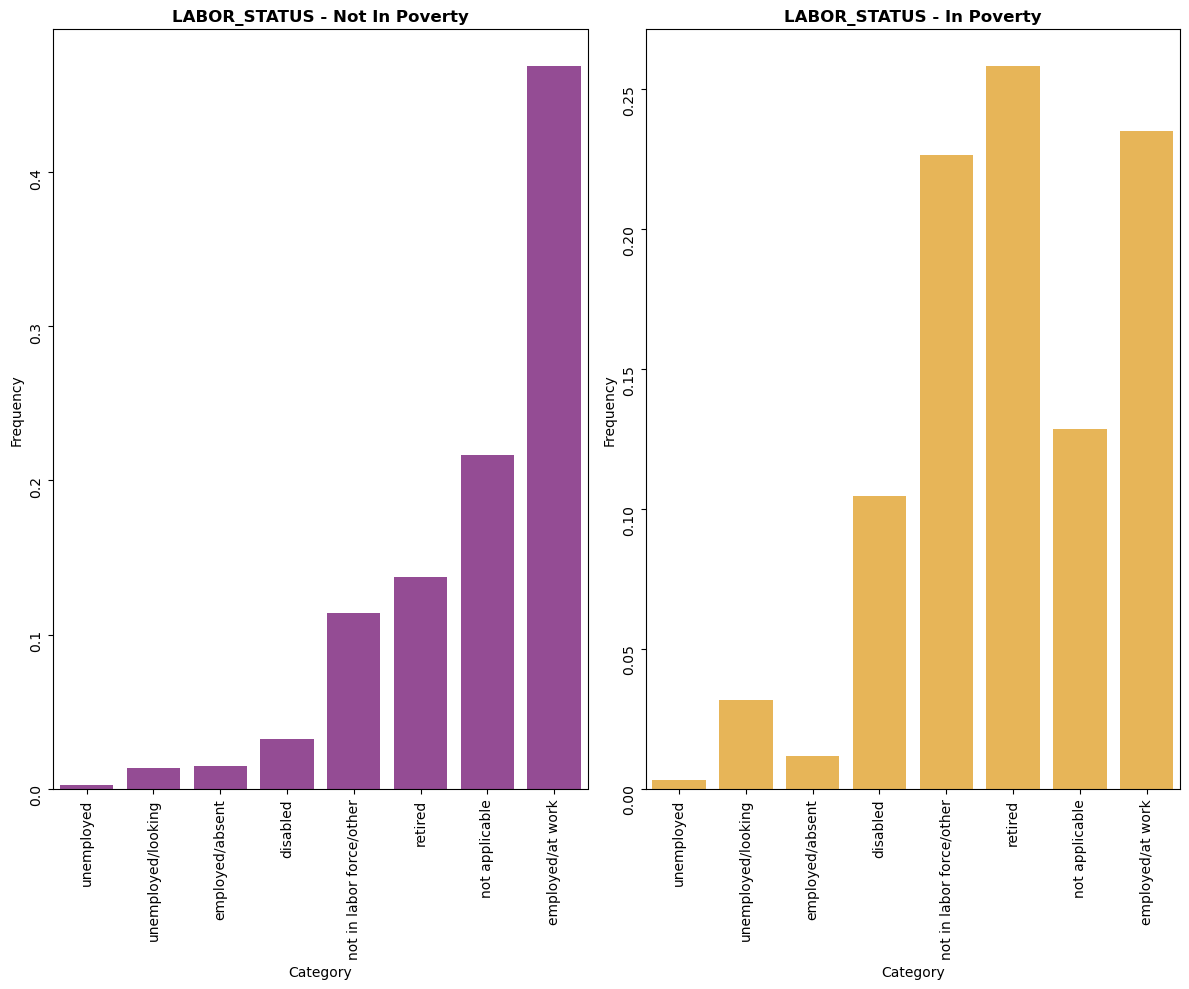

In [141]:
custom_frequency_plot("LABOR_STATUS", 'purple')

Distribution of Labor Status by Poverty Status. Majority is not employed (retired/not in labor force) for those that are in poverty and employed for those that are not in poverty.

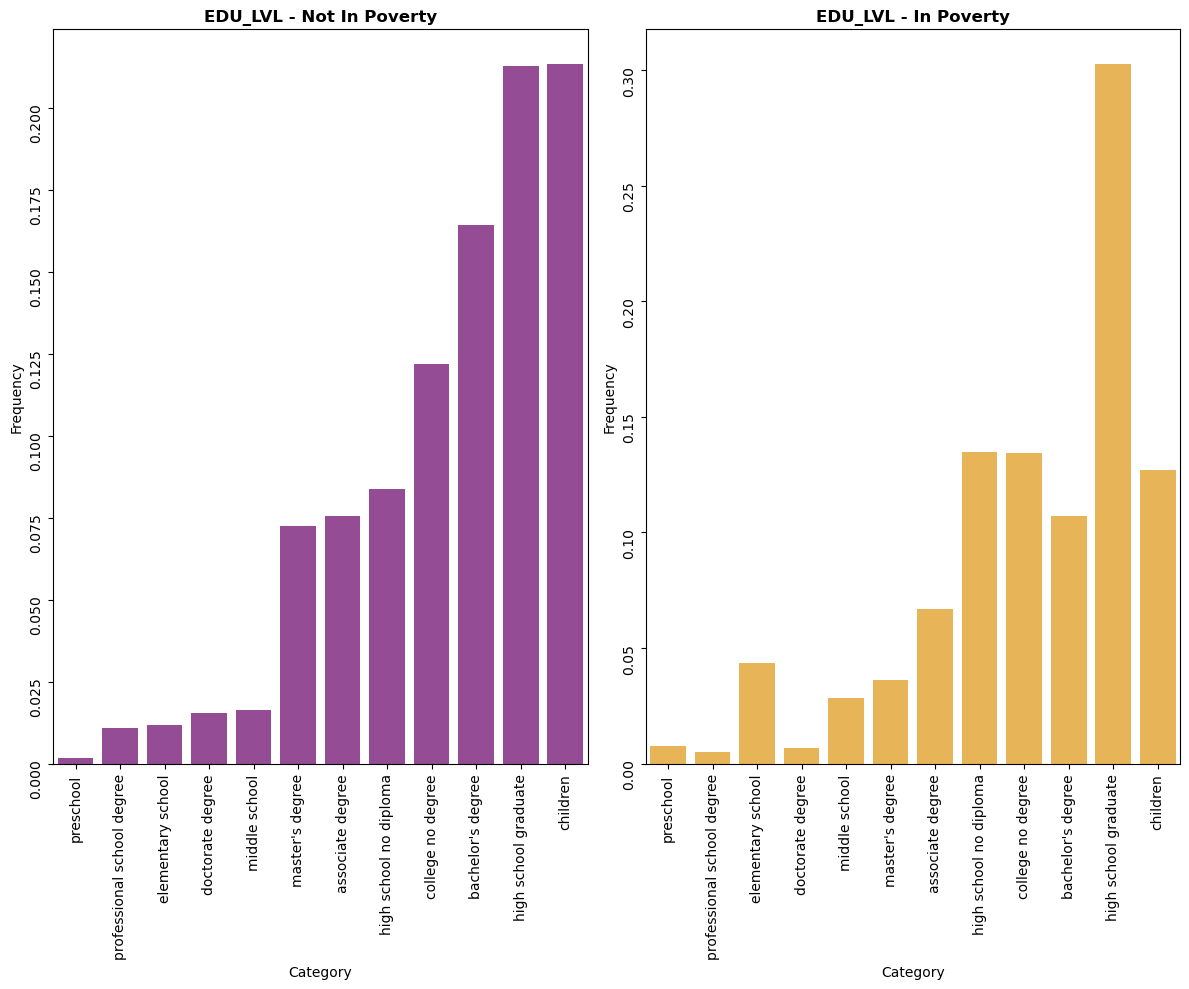

In [142]:
custom_frequency_plot("EDU_LVL", "purple")

Distribution of Education Level by Poverty Status. For those in poverty, highest frequency category is high school graduates. For those not in poverty, children, high school graduates, and those with bachelor's degrees compose the majority. 

## Exploratory Data Analysis Conclusion<a id='eda_c'></a>

Numerical and categorical features were analyzed with a variety of techniques to gain more information about the relationship among various variables within the dataset. Data is highly imbalanced relative to the target variable. Less than 8% of people included are in poverty. Classification models will be constructed to determine how much influence specific factors have on poverty status. Additionally, clustering will be performed to generate more insights on specific categories of people in the dataset. 